<h1>국내 여행 로그 데이터(서부권) (2023)</h1>
<h3>다운 받은 국내 여행 로그 데이터는 training과 validation 데이터만 제공되므로 validation 데이터를 test 데이터로 사용<h3>


<hr>
<h2>[패키지 및 데이터 로드]</h2>

In [1152]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 

# 숫자 표기 설정
pd.options.display.float_format = '{:,.2f}'.format # 지수 없이 숫자로
#pd.reset_option('display.float_format') # 지수표기법

# 출력 설정 변경 (None : 모든 행,열 출력)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
#pd.reset_option('all') # 설정 변경 초기화 

In [1153]:
# 분석용 데이터 불러오기
raw_traveller_master = pd.read_csv('data/validation/original_data/여행객.csv', encoding='UTF-8')
raw_companion_info = pd.read_csv('data/validation/original_data/동반자정보.csv', encoding='UTF-8')
raw_travel = pd.read_csv('data/validation/original_data/여행.csv', encoding='UTF-8')
raw_mvmn_consume = pd.read_csv('data/validation/original_data/이동수단소비내역.csv', encoding='UTF-8')
raw_lodge_consume = pd.read_csv('data/validation/original_data/숙박소비내역.csv', encoding='UTF-8')
raw_activity = pd.read_csv('data/validation/original_data/활동내역.csv', encoding='UTF-8')
raw_activity_consume = pd.read_csv('data/validation/original_data/활동소비내역.csv', encoding='UTF-8')
raw_adv_consume = pd.read_csv('data/validation/original_data/사전소비내역.csv', encoding='UTF-8')

# 복사본 만들기 
traveller_master = raw_traveller_master.copy()
companion_info = raw_companion_info.copy()
travel = raw_travel.copy()
mvmn_consume = raw_mvmn_consume.copy()
lodge_consume = raw_lodge_consume.copy()
activity = raw_activity.copy()
activity_consume = raw_activity_consume.copy()
adv_consume = raw_adv_consume.copy()

<hr>
<h2>[한글값 매핑]</h2>

In [1154]:
# 코드 'ACT'
ACT_mapping = {
    1 : '취식',
    2 : '쇼핑 / 구매',
    3 : '체험 활동 / 입장 및 관람',
    4 : '단순 구경 / 산책 / 걷기',
    5 : '휴식',
    6 : '기타 활동',
    7 : '환승/경유',
    99 : '없음'
}

# 코드 'AGE'
AGE_mapping = {
    1 : '~9세이하',
    2 : '10대',
    3 : '20대',
    4 : '30대',
    5 : '40대',
    6 : '50대',
    7 : '60대',
    8 : '70세이상'
}

# 코드 'GEN'
GEN_mapping = {
    1 : '남자',
    2 : '여자'
}

# 코드 'HTY'
HTY_mapping = {
    1 : '호텔',
    2 : '모텔/여관',
    3 : '펜션',
    4 : '콘도미니엄/리조트',
    5 : '야영(캠핑,글램핑등)',
    6 : '전통 숙박시설',
    7 : '게스트하우스',
    8 : '민박',
    9 : '자연휴양림내 시설',
    10 : '가족/친지집',
    11 : '기타',
    12 : '무박 여행'
}

# 코드 'JOB'
JOB_mapping = {
    1 : '관리자',
    2 : '전문가 및 관련 종사자',
    3 : '사무 종사자',
    4 : '서비스 종사자',
    5 : '판매 종사자',
    6 : '농림어업 숙련 종사자',
    7 : '기능원 및 관련 기능 종사자',
    8 : '장치․기계 조작 및 조립 종사자',
    9 : '단순노무종사자',
    10 : '군인',
    11 : '전업주부',
    12 : '학생',
    13 : '기타'
}

# 코드 'MIS'
MIS_mapping = {
    1 : '쇼핑',
    2 : '테마파크, 놀이시설, 동/식물원 방문',
    3 : '역사 유적지 방문',
    4 : '시티투어',
    5 : '야외 스포츠, 레포츠 활동',
    6 : '지역 문화예술/공연/전시시설 관람',
    7 : '유흥/오락(나이트라이프)',
    8 : '캠핑',
    9 : '지역 축제/이벤트 참가',
    10 : '온천/스파',
    11 : '교육/체험 프로그램 참가',
    12 : '드라마 촬영지 방문',
    13 : '종교/성지 순례',
    21 : 'Well-ness 여행',
    22 : 'SNS 인생샷 여행',
    23 : '호캉스 여행',
    24 : '신규 여행지 발굴',
    25 : '반려동물 동반 여행',
    26 : '인플루언서 따라하기 여행',
    27 : '친환경 여행(플로깅 여행)',
    28 : '등반 여행'
}

# 코드 'TCR'
TCR_mapping = {
    1 : '배우자',
    2 : '자녀',
    3 : '부모',
    4 : '조부모',
    5 : '형제/자매',
    6 : '친인척',
    7 : '친구',
    8 : '연인',
    9 : '동료',
    10 : '친목 단체/모임(동호회, 종교단체 등)',
    11 : '기타'
}

# 코드 'TMT'
TMT_mapping = {
    1 : '일상적인 환경 및 역할에서의 탈출, 지루함 탈피',
    2 : '쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식',
    3 : '여행 동반자와의 친밀감 및 유대감 증진',
    4 : '진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기',
    5 : 'SNS 사진 등록 등 과시',
    6 : '운동, 건강 증진 및 충전',
    7 : '새로운 경험 추구',
    8 : '역사 탐방, 문화적 경험 등 교육적 동기',
    9 : '특별한 목적(칠순여행, 신혼여행, 수학여행, 인센티브여행)',
    10 : '기타'
}

# 코드 'TSY' (자연 VS 도시)
TSY_mapping = {
    1 : '자연 선호(강)',
    2 : '자연 선호(중)',
    3 : '자연 선호(약)',
    4 : '중립',
    5 : '도시 선호(약)',
    6 : '도시 선호(중)',
    7 : '도시 선호(강)'
}

# 코드 'TTM'
TTM_mapping = {
    1 : '1주일',
    2 : '한달',
    3 : '1년',
    4 : '기타'
}

In [1155]:
# 데이터프레임 변환 함수
def convert_codes_to_korean(df, column_name, mapping) : 
    if column_name in df.columns : 
        df[column_name] = df[column_name].astype('int64')
        df[column_name] = df[column_name].map(mapping)
    return df

<hr>
<h2>[여행객.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [1156]:
# 필요한 변수 리스트
columns_to_keep_traveller = [
    'TRAVELER_ID', 'GENDER', 'AGE_GRP', 'JOB_NM', 'TRAVEL_TERM', 'TRAVEL_LIKE_SGG_1', 'TRAVEL_LIKE_SGG_2', 'TRAVEL_LIKE_SGG_3', 
    'TRAVEL_STYL_1','TRAVEL_STYL_2','TRAVEL_STYL_3','TRAVEL_STYL_4','TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
    'TRAVEL_STATUS_RESIDENCE', 'TRAVEL_STATUS_DESTINATION', 'TRAVEL_STATUS_ACCOMPANY', 'TRAVEL_MOTIVE_1', 'TRAVEL_COMPANIONS_NUM'
    ]

# traveller_master에 필요한 변수만 남기고 저장
traveller_master = traveller_master[columns_to_keep_traveller]

# 변수명 변경
traveller_master = traveller_master.rename(columns={'TRAVEL_MOTIVE_1' : 'TRAVEL_MOTIVE'})

# 결과 확인
print(traveller_master.head())

  TRAVELER_ID GENDER  AGE_GRP  JOB_NM  TRAVEL_TERM  TRAVEL_LIKE_SGG_1  TRAVEL_LIKE_SGG_2  TRAVEL_LIKE_SGG_3  TRAVEL_STYL_1  TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  TRAVEL_STYL_7  TRAVEL_STYL_8 TRAVEL_STATUS_RESIDENCE TRAVEL_STATUS_DESTINATION TRAVEL_STATUS_ACCOMPANY  TRAVEL_MOTIVE  TRAVEL_COMPANIONS_NUM
0     g005903      남       30       5            2              42210              44825              41270              1              1              2              1              1              7              7              7                     경기도                        충남                자녀 동반 여행              2                      4
1     g011387      여       20      13            2              50130              26350              30140              3              6              6              2              2              5              6              5                    충청남도                        대전             2인 여행(가족 외)              1    

In [1157]:
# 데이터의 행, 열 개수 출력
print('여행객.csv의 행, 열 개수 : ')
print(traveller_master.shape)

여행객.csv의 행, 열 개수 : 
(320, 21)


In [1158]:
# 데이터의 구조와 타입 확인
print('여행객.csv의 구조와 타입 : ')
print(traveller_master.info())

여행객.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TRAVELER_ID                320 non-null    object
 1   GENDER                     320 non-null    object
 2   AGE_GRP                    320 non-null    int64 
 3   JOB_NM                     320 non-null    int64 
 4   TRAVEL_TERM                320 non-null    int64 
 5   TRAVEL_LIKE_SGG_1          320 non-null    int64 
 6   TRAVEL_LIKE_SGG_2          320 non-null    int64 
 7   TRAVEL_LIKE_SGG_3          320 non-null    int64 
 8   TRAVEL_STYL_1              320 non-null    int64 
 9   TRAVEL_STYL_2              320 non-null    int64 
 10  TRAVEL_STYL_3              320 non-null    int64 
 11  TRAVEL_STYL_4              320 non-null    int64 
 12  TRAVEL_STYL_5              320 non-null    int64 
 13  TRAVEL_STYL_6              320 non-null    int

In [1159]:
# 데이터의 결측치 확인
print('여행객.csv의 결측치 : ')
print(traveller_master.isnull().sum())

여행객.csv의 결측치 : 
TRAVELER_ID                  0
GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
dtype: int64


In [1160]:
# 데이터 살펴보기
traveller_master.head()

,TRAVELER_ID,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM
0,g005903,남,30,5,2,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4
1,g011387,여,20,13,2,50130,26350,30140,3,6,6,2,2,5,6,5,충청남도,대전,2인 여행(가족 외),1,1
2,g003709,여,30,2,2,42810,26710,46130,4,5,3,2,5,3,5,6,인천광역시,대전,3대 동반 여행(친척 포함),7,2
3,g002674,남,40,8,2,42210,46710,43800,1,7,1,7,1,1,1,6,경상남도,광주,2인 여행(가족 외),6,1
4,g013104,남,30,3,2,46710,45110,50110,2,6,2,2,1,3,1,2,광주광역시,전남,나홀로 여행,1,0


<h3>2. 전처리</h3>

<h5>1) 모든 CSV 파일 통합을 위해 TRAVELER_ID를 TRAVEL_ID 형식으로 변환</h5>

In [1161]:
# TRAVELER_ID의 가장 앞의 알파벳과 _를 추출하여 TRAVELER_ID에 결합하기 위한 함수
def modify_travel_id(travel_id):
    match = re.match(r'([a-zA-Z])(\d+)', travel_id)
    if match:
        return f'{match.group(1)}_{match.group(0)}'
    return travel_id

# TRAVELER_ID 변환
traveller_master['TRAVEL_ID'] = traveller_master['TRAVELER_ID'].apply(modify_travel_id)

# 변환 결과 확인
traveller_master[['TRAVELER_ID', 'TRAVEL_ID']].head()

,TRAVELER_ID,TRAVEL_ID
0,g005903,g_g005903
1,g011387,g_g011387
2,g003709,g_g003709
3,g002674,g_g002674
4,g013104,g_g013104


In [1162]:
# TRAVELER_ID 컬럼 삭제
traveller_master.drop(columns=['TRAVELER_ID'], inplace=True)

# 결과 확인
traveller_master.head()

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID
0,남,30,5,2,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4,g_g005903
1,여,20,13,2,50130,26350,30140,3,6,6,2,2,5,6,5,충청남도,대전,2인 여행(가족 외),1,1,g_g011387
2,여,30,2,2,42810,26710,46130,4,5,3,2,5,3,5,6,인천광역시,대전,3대 동반 여행(친척 포함),7,2,g_g003709
3,남,40,8,2,42210,46710,43800,1,7,1,7,1,1,1,6,경상남도,광주,2인 여행(가족 외),6,1,g_g002674
4,남,30,3,2,46710,45110,50110,2,6,2,2,1,3,1,2,광주광역시,전남,나홀로 여행,1,0,g_g013104


<h5>2) JOB_NM 변수 코드 'JOB' 매핑</h5>

In [1163]:
traveller_master = convert_codes_to_korean(traveller_master, 'JOB_NM', JOB_mapping)

# 결과 확인
traveller_master.head()

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID
0,남,30,판매 종사자,2,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4,g_g005903
1,여,20,기타,2,50130,26350,30140,3,6,6,2,2,5,6,5,충청남도,대전,2인 여행(가족 외),1,1,g_g011387
2,여,30,전문가 및 관련 종사자,2,42810,26710,46130,4,5,3,2,5,3,5,6,인천광역시,대전,3대 동반 여행(친척 포함),7,2,g_g003709
3,남,40,장치․기계 조작 및 조립 종사자,2,42210,46710,43800,1,7,1,7,1,1,1,6,경상남도,광주,2인 여행(가족 외),6,1,g_g002674
4,남,30,사무 종사자,2,46710,45110,50110,2,6,2,2,1,3,1,2,광주광역시,전남,나홀로 여행,1,0,g_g013104


<h5>3) TRAVEL_TERM 변수 코드 'TTM' 매핑</h5>

In [1164]:
traveller_master = convert_codes_to_korean(traveller_master, 'TRAVEL_TERM', TTM_mapping)

# 결과 확인
traveller_master.head()

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID
0,남,30,판매 종사자,한달,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4,g_g005903
1,여,20,기타,한달,50130,26350,30140,3,6,6,2,2,5,6,5,충청남도,대전,2인 여행(가족 외),1,1,g_g011387
2,여,30,전문가 및 관련 종사자,한달,42810,26710,46130,4,5,3,2,5,3,5,6,인천광역시,대전,3대 동반 여행(친척 포함),7,2,g_g003709
3,남,40,장치․기계 조작 및 조립 종사자,한달,42210,46710,43800,1,7,1,7,1,1,1,6,경상남도,광주,2인 여행(가족 외),6,1,g_g002674
4,남,30,사무 종사자,한달,46710,45110,50110,2,6,2,2,1,3,1,2,광주광역시,전남,나홀로 여행,1,0,g_g013104


<h5>4) TRAVEL_STYL_1~8 변수 코드 'TSY' 매핑</h5>

In [1165]:
traveller_master = convert_codes_to_korean(traveller_master, 'TRAVEL_STYL_1', TSY_mapping)
traveller_master = convert_codes_to_korean(traveller_master, 'TRAVEL_STYL_2', TSY_mapping)
traveller_master = convert_codes_to_korean(traveller_master, 'TRAVEL_STYL_3', TSY_mapping)
traveller_master = convert_codes_to_korean(traveller_master, 'TRAVEL_STYL_4', TSY_mapping)
traveller_master = convert_codes_to_korean(traveller_master, 'TRAVEL_STYL_5', TSY_mapping)
traveller_master = convert_codes_to_korean(traveller_master, 'TRAVEL_STYL_6', TSY_mapping)
traveller_master = convert_codes_to_korean(traveller_master, 'TRAVEL_STYL_7', TSY_mapping)
traveller_master = convert_codes_to_korean(traveller_master, 'TRAVEL_STYL_8', TSY_mapping)

# 결과 확인
traveller_master.head()

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID
0,남,30,판매 종사자,한달,42210,44825,41270,자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(강),자연 선호(강),도시 선호(강),도시 선호(강),도시 선호(강),경기도,충남,자녀 동반 여행,2,4,g_g005903
1,여,20,기타,한달,50130,26350,30140,자연 선호(약),도시 선호(중),도시 선호(중),자연 선호(중),자연 선호(중),도시 선호(약),도시 선호(중),도시 선호(약),충청남도,대전,2인 여행(가족 외),1,1,g_g011387
2,여,30,전문가 및 관련 종사자,한달,42810,26710,46130,중립,도시 선호(약),자연 선호(약),자연 선호(중),도시 선호(약),자연 선호(약),도시 선호(약),도시 선호(중),인천광역시,대전,3대 동반 여행(친척 포함),7,2,g_g003709
3,남,40,장치․기계 조작 및 조립 종사자,한달,42210,46710,43800,자연 선호(강),도시 선호(강),자연 선호(강),도시 선호(강),자연 선호(강),자연 선호(강),자연 선호(강),도시 선호(중),경상남도,광주,2인 여행(가족 외),6,1,g_g002674
4,남,30,사무 종사자,한달,46710,45110,50110,자연 선호(중),도시 선호(중),자연 선호(중),자연 선호(중),자연 선호(강),자연 선호(약),자연 선호(강),자연 선호(중),광주광역시,전남,나홀로 여행,1,0,g_g013104


<h5>5) TRAVEL_MOTIVE 변수 코드 'TMT' 매핑</h5>

In [1166]:
traveller_master = convert_codes_to_korean(traveller_master, 'TRAVEL_MOTIVE', TMT_mapping)

# 결과 확인
traveller_master.head()

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID
0,남,30,판매 종사자,한달,42210,44825,41270,자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(강),자연 선호(강),도시 선호(강),도시 선호(강),도시 선호(강),경기도,충남,자녀 동반 여행,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",4,g_g005903
1,여,20,기타,한달,50130,26350,30140,자연 선호(약),도시 선호(중),도시 선호(중),자연 선호(중),자연 선호(중),도시 선호(약),도시 선호(중),도시 선호(약),충청남도,대전,2인 여행(가족 외),"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,g_g011387
2,여,30,전문가 및 관련 종사자,한달,42810,26710,46130,중립,도시 선호(약),자연 선호(약),자연 선호(중),도시 선호(약),자연 선호(약),도시 선호(약),도시 선호(중),인천광역시,대전,3대 동반 여행(친척 포함),새로운 경험 추구,2,g_g003709
3,남,40,장치․기계 조작 및 조립 종사자,한달,42210,46710,43800,자연 선호(강),도시 선호(강),자연 선호(강),도시 선호(강),자연 선호(강),자연 선호(강),자연 선호(강),도시 선호(중),경상남도,광주,2인 여행(가족 외),"운동, 건강 증진 및 충전",1,g_g002674
4,남,30,사무 종사자,한달,46710,45110,50110,자연 선호(중),도시 선호(중),자연 선호(중),자연 선호(중),자연 선호(강),자연 선호(약),자연 선호(강),자연 선호(중),광주광역시,전남,나홀로 여행,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",0,g_g013104


<h3>3. 전처리 후 확인</h3>

In [1167]:
# TRAVEL_ID 중복 여부 확인
duplicates = traveller_master[traveller_master.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
    print(duplicates)
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [1168]:
# 데이터의 구조와 타입 확인
print('여행객.csv의 구조와 타입 : ')
print(traveller_master.info())

여행객.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   GENDER                     320 non-null    object
 1   AGE_GRP                    320 non-null    int64 
 2   JOB_NM                     320 non-null    object
 3   TRAVEL_TERM                320 non-null    object
 4   TRAVEL_LIKE_SGG_1          320 non-null    int64 
 5   TRAVEL_LIKE_SGG_2          320 non-null    int64 
 6   TRAVEL_LIKE_SGG_3          320 non-null    int64 
 7   TRAVEL_STYL_1              320 non-null    object
 8   TRAVEL_STYL_2              320 non-null    object
 9   TRAVEL_STYL_3              320 non-null    object
 10  TRAVEL_STYL_4              320 non-null    object
 11  TRAVEL_STYL_5              320 non-null    object
 12  TRAVEL_STYL_6              320 non-null    object
 13  TRAVEL_STYL_7              320 non-null    obj

In [1169]:
# 데이터의 결측치 확인
print('여행객.csv의 결측치 : ')
print(traveller_master.isnull().sum())

여행객.csv의 결측치 : 
GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
TRAVEL_ID                    0
dtype: int64


In [1170]:
# 데이터 살펴보기
traveller_master.head()

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID
0,남,30,판매 종사자,한달,42210,44825,41270,자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(강),자연 선호(강),도시 선호(강),도시 선호(강),도시 선호(강),경기도,충남,자녀 동반 여행,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",4,g_g005903
1,여,20,기타,한달,50130,26350,30140,자연 선호(약),도시 선호(중),도시 선호(중),자연 선호(중),자연 선호(중),도시 선호(약),도시 선호(중),도시 선호(약),충청남도,대전,2인 여행(가족 외),"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,g_g011387
2,여,30,전문가 및 관련 종사자,한달,42810,26710,46130,중립,도시 선호(약),자연 선호(약),자연 선호(중),도시 선호(약),자연 선호(약),도시 선호(약),도시 선호(중),인천광역시,대전,3대 동반 여행(친척 포함),새로운 경험 추구,2,g_g003709
3,남,40,장치․기계 조작 및 조립 종사자,한달,42210,46710,43800,자연 선호(강),도시 선호(강),자연 선호(강),도시 선호(강),자연 선호(강),자연 선호(강),자연 선호(강),도시 선호(중),경상남도,광주,2인 여행(가족 외),"운동, 건강 증진 및 충전",1,g_g002674
4,남,30,사무 종사자,한달,46710,45110,50110,자연 선호(중),도시 선호(중),자연 선호(중),자연 선호(중),자연 선호(강),자연 선호(약),자연 선호(강),자연 선호(중),광주광역시,전남,나홀로 여행,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",0,g_g013104


<h3>4. 전처리 CSV 저장</h3>

In [1171]:
traveller_master.to_csv('data/validation/preprocessing_data/여행객_전처리.csv',index=False)

<hr>
<h2>[동반자정보.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [1172]:
# 필요한 변수 리스트
columns_to_keep_companion = [
    'TRAVEL_ID', 'REL_CD', 'COMPANION_GENDER', 'COMPANION_AGE_GRP'
    ]

# companion_info에 필요한 변수만 남기고 저장
companion_info = companion_info[columns_to_keep_companion]

# 결과 확인
print(companion_info.head())

   TRAVEL_ID  REL_CD  COMPANION_GENDER  COMPANION_AGE_GRP
0  e_e000821       1                 2                  4
1  e_e000821       7                 2                  4
2  e_e000821       7                 2                  4
3  e_e000821       7                 2                  4
4  e_e000821       7                 2                  4


In [1173]:
# 데이터의 행, 열 개수 출력
print('동반자정보.csv의 행, 열 개수 : ')
print(companion_info.shape)

동반자정보.csv의 행, 열 개수 : 
(464, 4)


In [1174]:
# 데이터의 구조와 타입 확인
print('동반자정보.csv의 구조와 타입 : ')
print(companion_info.info())

동반자정보.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TRAVEL_ID          464 non-null    object
 1   REL_CD             464 non-null    int64 
 2   COMPANION_GENDER   464 non-null    int64 
 3   COMPANION_AGE_GRP  464 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.6+ KB
None


In [1175]:
# 데이터의 결측치 확인
print('동반자정보.csv의 결측치 : ')
print(companion_info.isnull().sum())

동반자정보.csv의 결측치 : 
TRAVEL_ID            0
REL_CD               0
COMPANION_GENDER     0
COMPANION_AGE_GRP    0
dtype: int64


In [1176]:
# 데이터 살펴보기
companion_info.head()

,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP
0,e_e000821,1,2,4
1,e_e000821,7,2,4
2,e_e000821,7,2,4
3,e_e000821,7,2,4
4,e_e000821,7,2,4


<h3>2. 전처리</h3>

<h5>1) REL_CD 변수 코드 'TCR' 매핑</h5>

In [1177]:
companion_info = convert_codes_to_korean(companion_info, 'REL_CD', TCR_mapping)

# 결과 확인
companion_info.head()

,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP
0,e_e000821,배우자,2,4
1,e_e000821,친구,2,4
2,e_e000821,친구,2,4
3,e_e000821,친구,2,4
4,e_e000821,친구,2,4


<h5>2) COMPANION_GENDER 변수 코드 'GEN' 매핑</h5>

In [1178]:
companion_info = convert_codes_to_korean(companion_info, 'COMPANION_GENDER', GEN_mapping)

# 결과 확인
companion_info.head()

,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP
0,e_e000821,배우자,여자,4
1,e_e000821,친구,여자,4
2,e_e000821,친구,여자,4
3,e_e000821,친구,여자,4
4,e_e000821,친구,여자,4


<h5>3) COMPANION_AGE_GRP 변수 코드 'AGE' 매핑</h5>

In [1179]:
companion_info = convert_codes_to_korean(companion_info, 'COMPANION_AGE_GRP', AGE_mapping)

# 결과 확인
companion_info.head()

,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP
0,e_e000821,배우자,여자,30대
1,e_e000821,친구,여자,30대
2,e_e000821,친구,여자,30대
3,e_e000821,친구,여자,30대
4,e_e000821,친구,여자,30대


<h3>3. 전처리 후 확인</h3>

In [1180]:
# TRAVEL_ID 중복 여부 확인
duplicates = companion_info[companion_info.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
    print(duplicates)
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 있습니다.
     TRAVEL_ID REL_CD COMPANION_GENDER COMPANION_AGE_GRP
0    e_e000821    배우자               여자               30대
1    e_e000821     친구               여자               30대
2    e_e000821     친구               여자               30대
3    e_e000821     친구               여자               30대
4    e_e000821     친구               여자               30대
..         ...    ...              ...               ...
452  g_g012625     자녀               남자             ~9세이하
453  g_g012629     자녀               여자             ~9세이하
454  g_g012629    배우자               남자               40대
459  g_g012762    배우자               여자               30대
460  g_g012762     자녀               남자             ~9세이하

[292 rows x 4 columns]


In [1181]:
# 데이터의 구조와 타입 확인
print('동반자정보.csv의 구조와 타입 : ')
print(companion_info.info())

동반자정보.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TRAVEL_ID          464 non-null    object
 1   REL_CD             464 non-null    object
 2   COMPANION_GENDER   464 non-null    object
 3   COMPANION_AGE_GRP  464 non-null    object
dtypes: object(4)
memory usage: 14.6+ KB
None


In [1182]:
# 데이터의 결측치 확인
print('동반자정보.csv의 결측치 : ')
print(companion_info.isnull().sum())

동반자정보.csv의 결측치 : 
TRAVEL_ID            0
REL_CD               0
COMPANION_GENDER     0
COMPANION_AGE_GRP    0
dtype: int64


In [1183]:
# 데이터 살펴보기
companion_info.head()

,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP
0,e_e000821,배우자,여자,30대
1,e_e000821,친구,여자,30대
2,e_e000821,친구,여자,30대
3,e_e000821,친구,여자,30대
4,e_e000821,친구,여자,30대


<h3>4. 전처리 CSV 저장</h3>

In [1184]:
companion_info.to_csv('data/validation/preprocessing_data/동반자_전처리.csv',index=False)

<hr>
<h2>[여행.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [1185]:
# 필요한 변수 리스트
columns_to_keep_travel = [
    'TRAVEL_ID', 'TRAVEL_PURPOSE', 'TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'TRAVEL_MISSION_CHECK'
    ]

# travel에 필요한 변수만 남기고 저장
travel = travel[columns_to_keep_travel]

# 결과 확인
print(travel.head())

   TRAVEL_ID TRAVEL_PURPOSE TRAVEL_START_YMD TRAVEL_END_YMD TRAVEL_MISSION_CHECK
0  e_e000821     1;2;21;4;8       2023-05-27     2023-05-29              21;4;22
1  e_e013141              4       2023-09-24     2023-09-25                1;4;2
2  e_e013180        2;4;6;4       2023-09-23     2023-09-24               2;6;26
3  e_e013191   2;21;22;26;3       2023-09-23     2023-09-24              5;27;28
4  f_f005447  10;12;13;21;3       2023-08-09     2023-08-11              3;10;13


In [1186]:
# 데이터의 행, 열 개수 출력
print('여행.csv의 행, 열 개수 : ')
print(travel.shape)

여행.csv의 행, 열 개수 : 
(320, 5)


In [1187]:
# 데이터의 구조와 타입 확인
print('여행.csv의 구조와 타입 : ')
print(travel.info())

여행.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             320 non-null    object
 1   TRAVEL_PURPOSE        320 non-null    object
 2   TRAVEL_START_YMD      320 non-null    object
 3   TRAVEL_END_YMD        320 non-null    object
 4   TRAVEL_MISSION_CHECK  320 non-null    object
dtypes: object(5)
memory usage: 12.6+ KB
None


In [1188]:
# 데이터의 결측치 확인
print('여행.csv의 결측치 : ')
print(travel.isnull().sum())

여행.csv의 결측치 : 
TRAVEL_ID               0
TRAVEL_PURPOSE          0
TRAVEL_START_YMD        0
TRAVEL_END_YMD          0
TRAVEL_MISSION_CHECK    0
dtype: int64


In [1189]:
# 데이터 살펴보기
travel.head()

,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK
0,e_e000821,1;2;21;4;8,2023-05-27,2023-05-29,21;4;22
1,e_e013141,4,2023-09-24,2023-09-25,1;4;2
2,e_e013180,2;4;6;4,2023-09-23,2023-09-24,2;6;26
3,e_e013191,2;21;22;26;3,2023-09-23,2023-09-24,5;27;28
4,f_f005447,10;12;13;21;3,2023-08-09,2023-08-11,3;10;13


<h3>2. 전처리</h3>

<h5>1) TRAVEL_PURPOSE 변수 코드 'MIS' 매핑</h5>

In [1190]:
# TRAVEL_PURPOSE 변수의 값이 세미콜론으로 분리되어 있으므로, 세미콜론 기준으로 분리하고 매핑 적용하는 함수
def convert_colon_to_korean(df, column_name, mapping):
    if column_name in df.columns:
        # 세미콜론으로 분리된 값들을 매핑 처리
        df[column_name] = df[column_name].apply(
            lambda x: ';'.join([mapping.get(int(i), str(i)) for i in x.split(';')])
        )
    return df

In [1191]:
travel = convert_colon_to_korean(travel, 'TRAVEL_PURPOSE', MIS_mapping)

# 결과 확인
travel.head()

,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK
0,e_e000821,"쇼핑;테마파크, 놀이시설, 동/식물원 방문;Well-ness 여행;시티투어;캠핑",2023-05-27,2023-05-29,21;4;22
1,e_e013141,시티투어,2023-09-24,2023-09-25,1;4;2
2,e_e013180,"테마파크, 놀이시설, 동/식물원 방문;시티투어;지역 문화예술/공연/전시시설 관람;시티투어",2023-09-23,2023-09-24,2;6;26
3,e_e013191,"테마파크, 놀이시설, 동/식물원 방문;Well-ness 여행;SNS 인생샷 여행;인...",2023-09-23,2023-09-24,5;27;28
4,f_f005447,온천/스파;드라마 촬영지 방문;종교/성지 순례;Well-ness 여행;역사 유적지 방문,2023-08-09,2023-08-11,3;10;13


<h5>2) TRAVEL_MISSION_CHECK 변수 코드 'MIS' 매핑</h5>

In [1192]:
travel = convert_colon_to_korean(travel, 'TRAVEL_MISSION_CHECK', MIS_mapping)

# 결과 확인
travel.head()

,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK
0,e_e000821,"쇼핑;테마파크, 놀이시설, 동/식물원 방문;Well-ness 여행;시티투어;캠핑",2023-05-27,2023-05-29,Well-ness 여행;시티투어;SNS 인생샷 여행
1,e_e013141,시티투어,2023-09-24,2023-09-25,"쇼핑;시티투어;테마파크, 놀이시설, 동/식물원 방문"
2,e_e013180,"테마파크, 놀이시설, 동/식물원 방문;시티투어;지역 문화예술/공연/전시시설 관람;시티투어",2023-09-23,2023-09-24,"테마파크, 놀이시설, 동/식물원 방문;지역 문화예술/공연/전시시설 관람;인플루언서 ..."
3,e_e013191,"테마파크, 놀이시설, 동/식물원 방문;Well-ness 여행;SNS 인생샷 여행;인...",2023-09-23,2023-09-24,"야외 스포츠, 레포츠 활동;친환경 여행(플로깅 여행);등반 여행"
4,f_f005447,온천/스파;드라마 촬영지 방문;종교/성지 순례;Well-ness 여행;역사 유적지 방문,2023-08-09,2023-08-11,역사 유적지 방문;온천/스파;종교/성지 순례


<h3>3. 전처리 후 확인</h3>

In [1193]:
# TRAVEL_ID 중복 여부 확인
duplicates = travel[travel.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
    print(duplicates)
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [1194]:
# 데이터의 구조와 타입 확인
print('여행.csv의 구조와 타입 : ')
print(travel.info())

여행.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             320 non-null    object
 1   TRAVEL_PURPOSE        320 non-null    object
 2   TRAVEL_START_YMD      320 non-null    object
 3   TRAVEL_END_YMD        320 non-null    object
 4   TRAVEL_MISSION_CHECK  320 non-null    object
dtypes: object(5)
memory usage: 12.6+ KB
None


In [1195]:
# 데이터의 결측치 확인
print('여행.csv의 결측치 : ')
print(travel.isnull().sum())

여행.csv의 결측치 : 
TRAVEL_ID               0
TRAVEL_PURPOSE          0
TRAVEL_START_YMD        0
TRAVEL_END_YMD          0
TRAVEL_MISSION_CHECK    0
dtype: int64


In [1196]:
# 데이터 살펴보기
travel.head()

,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK
0,e_e000821,"쇼핑;테마파크, 놀이시설, 동/식물원 방문;Well-ness 여행;시티투어;캠핑",2023-05-27,2023-05-29,Well-ness 여행;시티투어;SNS 인생샷 여행
1,e_e013141,시티투어,2023-09-24,2023-09-25,"쇼핑;시티투어;테마파크, 놀이시설, 동/식물원 방문"
2,e_e013180,"테마파크, 놀이시설, 동/식물원 방문;시티투어;지역 문화예술/공연/전시시설 관람;시티투어",2023-09-23,2023-09-24,"테마파크, 놀이시설, 동/식물원 방문;지역 문화예술/공연/전시시설 관람;인플루언서 ..."
3,e_e013191,"테마파크, 놀이시설, 동/식물원 방문;Well-ness 여행;SNS 인생샷 여행;인...",2023-09-23,2023-09-24,"야외 스포츠, 레포츠 활동;친환경 여행(플로깅 여행);등반 여행"
4,f_f005447,온천/스파;드라마 촬영지 방문;종교/성지 순례;Well-ness 여행;역사 유적지 방문,2023-08-09,2023-08-11,역사 유적지 방문;온천/스파;종교/성지 순례


<h3>4. 전처리 CSV 저장</h3>

In [1197]:
travel.to_csv('data/validation/preprocessing_data/여행_전처리.csv',index=False)

<hr>
<h2>[이동수단소비내역.csv]</h2>

In [1198]:
# 필요한 변수 리스트
columns_to_keep_mvmn_consume = [
    'TRAVEL_ID', 'MVMN_SE_NM', 'PAYMENT_AMT_WON'
    ]

# mvmn_consume에 필요한 변수만 남기고 저장
mvmn_consume = mvmn_consume[columns_to_keep_mvmn_consume]

# 결과 확인
print(mvmn_consume.head())

   TRAVEL_ID MVMN_SE_NM  PAYMENT_AMT_WON
0  g_g004813         택시             3000
1  g_g008723        지하철             3000
2  g_g003478         택시             4500
3  g_g007188         택시             6000
4  g_g007207        지하철             7000


<h3>1. 변수 추출 및 검토</h3>

In [1199]:
# 데이터의 행, 열 개수 출력
print('이동수단소비내역.csv의 행, 열 개수 : ')
print(mvmn_consume.shape)

이동수단소비내역.csv의 행, 열 개수 : 
(683, 3)


In [1200]:
# 데이터의 구조와 타입 확인
print('이동수단소비내역.csv의 구조와 타입 : ')
print(mvmn_consume.info())

이동수단소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TRAVEL_ID        683 non-null    object
 1   MVMN_SE_NM       683 non-null    object
 2   PAYMENT_AMT_WON  683 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 16.1+ KB
None


In [1201]:
# 데이터의 결측치 확인
print('이동수단소비내역.csv의 결측치 : ')
print(mvmn_consume.isnull().sum())

이동수단소비내역.csv의 결측치 : 
TRAVEL_ID          0
MVMN_SE_NM         0
PAYMENT_AMT_WON    0
dtype: int64


In [1202]:
# 데이터 살펴보기
mvmn_consume.head()

,TRAVEL_ID,MVMN_SE_NM,PAYMENT_AMT_WON
0,g_g004813,택시,3000
1,g_g008723,지하철,3000
2,g_g003478,택시,4500
3,g_g007188,택시,6000
4,g_g007207,지하철,7000


<h3>2. 전처리</h3>

<h5>1) 이동수단 소비내역인 걸 나타내기 위해서 변수명 변경

In [1203]:
mvmn_consume = mvmn_consume.rename(columns = {'PAYMENT_AMT_WON' : 'MVMN_WON'})

# 결과 확인
mvmn_consume.head()

,TRAVEL_ID,MVMN_SE_NM,MVMN_WON
0,g_g004813,택시,3000
1,g_g008723,지하철,3000
2,g_g003478,택시,4500
3,g_g007188,택시,6000
4,g_g007207,지하철,7000


<h5>2) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 주요이동수단 구하기

In [1204]:
# TRAVEL_ID별로 이동수단 빈도 계산
mvmn_consume_count = mvmn_consume.groupby(['TRAVEL_ID', 'MVMN_SE_NM']).size().reset_index(name='COUNT')

# TRAVEL_ID별로 가장 많이 사용된 이동수단 추출
mvmn_consume_major_transport = mvmn_consume_count.groupby('TRAVEL_ID').apply(
    lambda x: x[x['COUNT'] == x['COUNT'].max()]['MVMN_SE_NM'].tolist()  # 빈도수가 동일한 이동수단을 리스트로 결합
).reset_index(name='MAJOR_TRANSPORT')

# 결과 확인
print(mvmn_consume_major_transport.head())

   TRAVEL_ID          MAJOR_TRANSPORT
0  e_e000821       [자가용(승용/승합/트럭 등등)]
1  e_e013180       [자가용(승용/승합/트럭 등등)]
2  e_e013191  [버스 + 지하철, 시외/고속버스, 택시]
3  f_f005447       [자가용(승용/승합/트럭 등등)]
4  g_g000011       [자가용(승용/승합/트럭 등등)]


<h5>3) TRAVEL_ID가 중복되는 경우 이동수단 소비내역 전처리 - pivot_table

In [1205]:
# TRAVEL_ID 중복 여부 확인
duplicates = mvmn_consume[mvmn_consume.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 있습니다.


pivot_table 형식으로 변환하여, 이후 파생변수 추가 등 추가적인 분석을 쉽게 할 수 있도록 함

In [1206]:
# MVMN_SE_NM을 문자열 형식으로 변환
mvmn_consume['MVMN_SE_NM'] = mvmn_consume['MVMN_SE_NM'].astype(str)

# pivot_table 생성
mvmn_consume_pivot = mvmn_consume.pivot_table(
    index='TRAVEL_ID', 
    columns='MVMN_SE_NM', 
    values='MVMN_WON', 
    aggfunc='sum', 
    fill_value=0  # 결측값은 0으로
)

# 결과 확인
print(mvmn_consume_pivot.head())

MVMN_SE_NM  KTX/SRT(고속열차)  관광버스  기타  렌터카(승용/승합/버스 등등)  배/선박  버스 + 지하철  새마을/무궁화열차  시내/마을버스  시외/고속버스  자가용(승용/승합/트럭 등등)  자전거  지하철  캠핑카(자차 및 렌탈)     택시  항공기
TRAVEL_ID                                                                                                                                               
e_e000821               0     0   0                 0     0         0          0        0        0             50000    0    0             0      0    0
e_e013180               0     0   0                 0     0         0          0        0        0             54600    0    0             0      0    0
e_e013191               0     0   0                 0     0     23600          0        0    20100                 0    0    0             0  11200    0
f_f005447               0     0   0                 0     0         0          0        0        0             41000    0    0             0      0    0
g_g000011               0     0   0                 0     0         0          0  

2)에서 구했던 주요이동수단과 병합하여 mvmn_consume_new 데이터프레임 생성

In [1207]:
# 주요 이동수단과 피벗 테이블 병합
mvmn_consume_new_pivot = pd.merge(
    mvmn_consume_pivot.reset_index(),  # 피벗 테이블을 병합하기 위해 인덱스를 초기화
    mvmn_consume_major_transport,     # 주요 이동수단 데이터프레임
    on='TRAVEL_ID',                   # 공통 키: TRAVEL_ID
    how='left'                        # 병합 방식: 왼쪽 (피벗 테이블 기준)
)

# 결과 확인
print(mvmn_consume_new_pivot.head())

   TRAVEL_ID  KTX/SRT(고속열차)  관광버스  기타  렌터카(승용/승합/버스 등등)  배/선박  버스 + 지하철  새마을/무궁화열차  시내/마을버스  시외/고속버스  자가용(승용/승합/트럭 등등)  자전거  지하철  캠핑카(자차 및 렌탈)     택시  항공기          MAJOR_TRANSPORT
0  e_e000821              0     0   0                 0     0         0          0        0        0             50000    0    0             0      0    0       [자가용(승용/승합/트럭 등등)]
1  e_e013180              0     0   0                 0     0         0          0        0        0             54600    0    0             0      0    0       [자가용(승용/승합/트럭 등등)]
2  e_e013191              0     0   0                 0     0     23600          0        0    20100                 0    0    0             0  11200    0  [버스 + 지하철, 시외/고속버스, 택시]
3  f_f005447              0     0   0                 0     0         0          0        0        0             41000    0    0             0      0    0       [자가용(승용/승합/트럭 등등)]
4  g_g000011              0     0   0                 0     0         0          0        0        0

<h5>4) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 이동수단총소비액 파생변수 추가

In [1208]:
# TRAVEL_ID별로 이동수단의 총 소비액 계산
mvmn_consume_total = mvmn_consume.groupby('TRAVEL_ID')['MVMN_WON'].sum().reset_index(name='TOTAL_MVMN_WON')

# mvmn_consume_new_pivot 병합
mvmn_consume_new_pivot = mvmn_consume_new_pivot.merge(mvmn_consume_total, on='TRAVEL_ID', how='left')

# 결과 확인
print(mvmn_consume_new_pivot.head())

   TRAVEL_ID  KTX/SRT(고속열차)  관광버스  기타  렌터카(승용/승합/버스 등등)  배/선박  버스 + 지하철  새마을/무궁화열차  시내/마을버스  시외/고속버스  자가용(승용/승합/트럭 등등)  자전거  지하철  캠핑카(자차 및 렌탈)     택시  항공기          MAJOR_TRANSPORT  TOTAL_MVMN_WON
0  e_e000821              0     0   0                 0     0         0          0        0        0             50000    0    0             0      0    0       [자가용(승용/승합/트럭 등등)]           50000
1  e_e013180              0     0   0                 0     0         0          0        0        0             54600    0    0             0      0    0       [자가용(승용/승합/트럭 등등)]           54600
2  e_e013191              0     0   0                 0     0     23600          0        0    20100                 0    0    0             0  11200    0  [버스 + 지하철, 시외/고속버스, 택시]           54900
3  f_f005447              0     0   0                 0     0         0          0        0        0             41000    0    0             0      0    0       [자가용(승용/승합/트럭 등등)]           41000
4  g_g000011        

merge 후 결과의 가독성을 높이기 위해 TRAVEL_ID, MAJOR_TRANSPORT, TOTAL_MVMN_WON 만 추출

In [1209]:
mvmn_consume_new = mvmn_consume_new_pivot[['TRAVEL_ID', 'MAJOR_TRANSPORT', 'TOTAL_MVMN_WON']]
print(mvmn_consume_new)

     TRAVEL_ID          MAJOR_TRANSPORT  TOTAL_MVMN_WON
0    e_e000821       [자가용(승용/승합/트럭 등등)]           50000
1    e_e013180       [자가용(승용/승합/트럭 등등)]           54600
2    e_e013191  [버스 + 지하철, 시외/고속버스, 택시]           54900
3    f_f005447       [자가용(승용/승합/트럭 등등)]           41000
4    g_g000011       [자가용(승용/승합/트럭 등등)]          144330
..         ...                      ...             ...
293  g_g012863       [자가용(승용/승합/트럭 등등)]            2400
294  g_g012870    [버스 + 지하철, 새마을/무궁화열차]           29000
295  g_g012889       [자가용(승용/승합/트럭 등등)]           72714
296  g_g013064       [자가용(승용/승합/트럭 등등)]           71200
297  g_g013104       [자가용(승용/승합/트럭 등등)]           10000

[298 rows x 3 columns]


<h3>3. 전처리 후 확인</h3>

In [1210]:
# TRAVEL_ID 중복 여부 확인
duplicates = mvmn_consume_new[mvmn_consume_new.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [1211]:
# 데이터의 구조와 타입 확인
print('이동수단소비내역.csv의 구조와 타입 : ')
print(mvmn_consume_new.info())

이동수단소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TRAVEL_ID        298 non-null    object
 1   MAJOR_TRANSPORT  298 non-null    object
 2   TOTAL_MVMN_WON   298 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.1+ KB
None


In [1212]:
# 데이터의 결측치 확인
print('이동수단소비내역.csv의 결측치 : ')
print(mvmn_consume_new.isnull().sum())

이동수단소비내역.csv의 결측치 : 
TRAVEL_ID          0
MAJOR_TRANSPORT    0
TOTAL_MVMN_WON     0
dtype: int64


In [1213]:
# 데이터 살펴보기
mvmn_consume_new.head()

,TRAVEL_ID,MAJOR_TRANSPORT,TOTAL_MVMN_WON
0,e_e000821,[자가용(승용/승합/트럭 등등)],50000
1,e_e013180,[자가용(승용/승합/트럭 등등)],54600
2,e_e013191,"[버스 + 지하철, 시외/고속버스, 택시]",54900
3,f_f005447,[자가용(승용/승합/트럭 등등)],41000
4,g_g000011,[자가용(승용/승합/트럭 등등)],144330


<h3>4. 전처리 CSV 저장</h3>

In [1214]:
mvmn_consume_new_pivot.to_csv('data/validation/preprocessing_data/이동수단소비내역_pivot_전처리.csv',index=False)

In [1215]:
mvmn_consume_new.to_csv('data/validation/preprocessing_data/이동수단소비내역_전처리.csv',index=False)

<hr>
<h2>[숙박소비내역.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [1216]:
# 필요한 변수 리스트
columns_to_keep_lodge_consume = [
    'TRAVEL_ID', 'LODGING_TYPE_CD', 'PAYMENT_AMT_WON'
    ]

# lodge_consume.shape에 필요한 변수만 남기고 저장
lodge_consume = lodge_consume[columns_to_keep_lodge_consume]

# 결과 확인
print(lodge_consume.head())

   TRAVEL_ID  LODGING_TYPE_CD  PAYMENT_AMT_WON
0  g_g006779                5           176000
1  g_g000617                5            45000
2  g_g000011                3           129000
3  g_g000027                2                0
4  g_g000194                4            60000


In [1217]:
# 데이터의 행, 열 개수 출력
print('숙박소비내역.csv의 행, 열 개수 : ')
print(lodge_consume.shape)

숙박소비내역.csv의 행, 열 개수 : 
(162, 3)


In [1218]:
# 데이터의 구조와 타입 확인
print('숙박소비내역.csv의 구조와 타입 : ')
print(lodge_consume.info())

숙박소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TRAVEL_ID        162 non-null    object
 1   LODGING_TYPE_CD  162 non-null    int64 
 2   PAYMENT_AMT_WON  162 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.9+ KB
None


In [1219]:
# 데이터의 결측치 확인
print('숙박소비내역.csv의 결측치 : ')
print(lodge_consume.isnull().sum())

숙박소비내역.csv의 결측치 : 
TRAVEL_ID          0
LODGING_TYPE_CD    0
PAYMENT_AMT_WON    0
dtype: int64


In [1220]:
# 데이터 살펴보기
lodge_consume.head()

,TRAVEL_ID,LODGING_TYPE_CD,PAYMENT_AMT_WON
0,g_g006779,5,176000
1,g_g000617,5,45000
2,g_g000011,3,129000
3,g_g000027,2,0
4,g_g000194,4,60000


<h3>2. 전처리</h3>

<h5>1) LODGING_TYPE_CD 변수 코드 'HTY' 매핑</h5>

In [1221]:
lodge_consume = convert_codes_to_korean(lodge_consume, 'LODGING_TYPE_CD', HTY_mapping)

# 결과 확인
lodge_consume.head()

,TRAVEL_ID,LODGING_TYPE_CD,PAYMENT_AMT_WON
0,g_g006779,"야영(캠핑,글램핑등)",176000
1,g_g000617,"야영(캠핑,글램핑등)",45000
2,g_g000011,펜션,129000
3,g_g000027,모텔/여관,0
4,g_g000194,콘도미니엄/리조트,60000


<h5>2) 숙박 소비내역인 걸 나타내기 위해서 변수명 변경</h5>

In [1222]:
lodge_consume = lodge_consume.rename(columns = {'PAYMENT_AMT_WON' : 'LODGE_WON'})

# 결과 확인
lodge_consume.head()

,TRAVEL_ID,LODGING_TYPE_CD,LODGE_WON
0,g_g006779,"야영(캠핑,글램핑등)",176000
1,g_g000617,"야영(캠핑,글램핑등)",45000
2,g_g000011,펜션,129000
3,g_g000027,모텔/여관,0
4,g_g000194,콘도미니엄/리조트,60000


<h5>3) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 주요숙소유형 구하기

In [1223]:
# TRAVEL_ID별로 숙소유형 빈도 계산
lodging_count = lodge_consume.groupby(['TRAVEL_ID', 'LODGING_TYPE_CD']).size().reset_index(name='COUNT')

# TRAVEL_ID별로 가장 많이 사용된 숙소유형 추출
lodge_major_type = lodging_count.groupby('TRAVEL_ID').apply(
    lambda x: x[x['COUNT'] == x['COUNT'].max()]['LODGING_TYPE_CD'].tolist()  # 빈도수가 동일한 숙소 유형을 리스트로 결합
).reset_index(name='MAJOR_LODGE_TYPE')

# 결과 확인
print(lodge_major_type.head())

   TRAVEL_ID MAJOR_LODGE_TYPE
0  f_f005447             [호텔]
1  g_g000011             [펜션]
2  g_g000013             [펜션]
3  g_g000024             [호텔]
4  g_g000027          [모텔/여관]


<h5>4) TRAVEL_ID가 중복되는 경우 숙소 소비내역 전처리 - pivot_table

In [1224]:
# TRAVEL_ID 중복 여부 확인
duplicates = lodge_consume[lodge_consume.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 있습니다.


pivot_table 형식으로 변환하여, 이후 파생변수 추가 등 추가적인 분석을 쉽게 할 수 있도록 함

In [1225]:
# pivot_table 생성
lodge_consume_pivot = lodge_consume.pivot_table(
    index='TRAVEL_ID', 
    columns='LODGING_TYPE_CD', 
    values='LODGE_WON', 
    aggfunc='sum', 
    fill_value=0  # 결측값은 0으로
)

# 결과 확인
print(lodge_consume_pivot.head())

LODGING_TYPE_CD  가족/친지집  게스트하우스  기타  모텔/여관  민박  야영(캠핑,글램핑등)  자연휴양림내 시설  전통 숙박시설  콘도미니엄/리조트      펜션      호텔
TRAVEL_ID                                                                                                 
f_f005447             0       0   0      0   0            0          0        0          0       0   50000
g_g000011             0       0   0      0   0            0          0        0          0  129000       0
g_g000013             0       0   0      0   0            0          0        0          0   93000       0
g_g000024             0       0   0      0   0            0          0        0          0       0  105000
g_g000027             0       0   0      0   0            0          0        0          0       0       0


3)에서 구했던 주요숙소유형과 병합하여 lodge_consume_new 데이터프레임 생성

In [1226]:
# 주요 이동수단과 피벗 테이블 병합
lodge_consume_new_pivot = pd.merge(
    lodge_consume_pivot.reset_index(),  # 피벗 테이블을 병합하기 위해 인덱스를 초기화
    lodge_major_type,     # 주요 이동수단 데이터프레임
    on='TRAVEL_ID',                   # 공통 키: TRAVEL_ID
    how='left'                        # 병합 방식: 왼쪽 (피벗 테이블 기준)
)

# 결과 확인
print(lodge_consume_new_pivot.head())

   TRAVEL_ID  가족/친지집  게스트하우스  기타  모텔/여관  민박  야영(캠핑,글램핑등)  자연휴양림내 시설  전통 숙박시설  콘도미니엄/리조트      펜션      호텔 MAJOR_LODGE_TYPE
0  f_f005447       0       0   0      0   0            0          0        0          0       0   50000             [호텔]
1  g_g000011       0       0   0      0   0            0          0        0          0  129000       0             [펜션]
2  g_g000013       0       0   0      0   0            0          0        0          0   93000       0             [펜션]
3  g_g000024       0       0   0      0   0            0          0        0          0       0  105000             [호텔]
4  g_g000027       0       0   0      0   0            0          0        0          0       0       0          [모텔/여관]


<h5>4) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 숙소총소비액 파생변수 추가

In [1227]:
# TRAVEL_ID별로 숙소 총 소비액 계산
lodge_consume_total = lodge_consume.groupby('TRAVEL_ID')['LODGE_WON'].sum().reset_index(name='TOTAL_LODGE_WON')

# lodge_consume_new_pivot와 병합
lodge_consume_new_pivot = lodge_consume_new_pivot.merge(lodge_consume_total, on='TRAVEL_ID', how='left')

# 결과 확인
print(lodge_consume_new_pivot.head())

   TRAVEL_ID  가족/친지집  게스트하우스  기타  모텔/여관  민박  야영(캠핑,글램핑등)  자연휴양림내 시설  전통 숙박시설  콘도미니엄/리조트      펜션      호텔 MAJOR_LODGE_TYPE  TOTAL_LODGE_WON
0  f_f005447       0       0   0      0   0            0          0        0          0       0   50000             [호텔]            50000
1  g_g000011       0       0   0      0   0            0          0        0          0  129000       0             [펜션]           129000
2  g_g000013       0       0   0      0   0            0          0        0          0   93000       0             [펜션]            93000
3  g_g000024       0       0   0      0   0            0          0        0          0       0  105000             [호텔]           105000
4  g_g000027       0       0   0      0   0            0          0        0          0       0       0          [모텔/여관]                0


merge 후 결과의 가독성을 높이기 위해 TRAVEL_ID, MAJOR_LODGE_TYPE, TOTAL_LODGE_WON 만 추출

In [1228]:
lodge_consume_new = lodge_consume_new_pivot[['TRAVEL_ID', 'MAJOR_LODGE_TYPE', 'TOTAL_LODGE_WON']]

# 결과 확인
print(lodge_consume_new.head())

   TRAVEL_ID MAJOR_LODGE_TYPE  TOTAL_LODGE_WON
0  f_f005447             [호텔]            50000
1  g_g000011             [펜션]           129000
2  g_g000013             [펜션]            93000
3  g_g000024             [호텔]           105000
4  g_g000027          [모텔/여관]                0


<h3>3. 전처리 후 확인</h3>

In [1229]:
# TRAVEL_ID 중복 여부 확인
duplicates = lodge_consume_new[lodge_consume_new.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [1230]:
# 데이터의 구조와 타입 확인
print('숙박소비내역.csv의 구조와 타입 : ')
print(lodge_consume_new.info())

숙박소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TRAVEL_ID         139 non-null    object
 1   MAJOR_LODGE_TYPE  139 non-null    object
 2   TOTAL_LODGE_WON   139 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.4+ KB
None


In [1231]:
# 데이터의 결측치 확인
print('숙박소비내역.csv의 결측치 : ')
print(lodge_consume_new.isnull().sum())

숙박소비내역.csv의 결측치 : 
TRAVEL_ID           0
MAJOR_LODGE_TYPE    0
TOTAL_LODGE_WON     0
dtype: int64


In [1232]:
# 데이터 살펴보기
lodge_consume_new.head()

,TRAVEL_ID,MAJOR_LODGE_TYPE,TOTAL_LODGE_WON
0,f_f005447,[호텔],50000
1,g_g000011,[펜션],129000
2,g_g000013,[펜션],93000
3,g_g000024,[호텔],105000
4,g_g000027,[모텔/여관],0


<h3>4. 전처리 CSV 저장</h3>

In [1233]:
lodge_consume_new_pivot.to_csv('data/validation/preprocessing_data/숙박소비내역_pivot_전처리.csv',index=False)

In [1234]:
lodge_consume_new.to_csv('data/validation/preprocessing_data/숙박소비내역_전처리.csv',index=False)

<hr>
<h2>[활동내역.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [1235]:
# 필요한 변수 리스트
columns_to_keep_activity = [
    'TRAVEL_ID', 'ACTIVITY_TYPE_CD'
    ]

# activity에 필요한 변수만 남기고 저장
activity = activity[columns_to_keep_activity]

# 결과 확인
print(activity.head())

   TRAVEL_ID  ACTIVITY_TYPE_CD
0  e_e000821                 1
1  e_e000821                 1
2  e_e000821                 1
3  e_e000821                 1
4  e_e000821                 4


In [1236]:
# 데이터의 행, 열 개수 출력
print('활동내역.csv의 행, 열 개수 : ')
print(activity.shape)

활동내역.csv의 행, 열 개수 : 
(3986, 2)


In [1237]:
# 데이터의 구조와 타입 확인
print('활동내역.csv의 구조와 타입 : ')
print(activity.info())

활동내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3986 entries, 0 to 3985
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TRAVEL_ID         3986 non-null   object
 1   ACTIVITY_TYPE_CD  3986 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.4+ KB
None


In [1238]:
# 데이터의 결측치 확인
print('활동내역.csv의 결측치 : ')
print(activity.isnull().sum())

활동내역.csv의 결측치 : 
TRAVEL_ID           0
ACTIVITY_TYPE_CD    0
dtype: int64


In [1239]:
# 데이터 살펴보기
activity.head()

,TRAVEL_ID,ACTIVITY_TYPE_CD
0,e_e000821,1
1,e_e000821,1
2,e_e000821,1
3,e_e000821,1
4,e_e000821,4


<h3>2. 전처리</h3>

<h5>1) ACTIVITY_TYPE_CD 변수 코드 'ACT' 매핑</h5>

In [1240]:
activity = convert_codes_to_korean(activity, 'ACTIVITY_TYPE_CD', ACT_mapping)

# 결과 확인
activity.head()

,TRAVEL_ID,ACTIVITY_TYPE_CD
0,e_e000821,취식
1,e_e000821,취식
2,e_e000821,취식
3,e_e000821,취식
4,e_e000821,단순 구경 / 산책 / 걷기


<h5>2) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 주요활동유형 구하기

In [1241]:
# TRAVEL_ID별로 활동유형 빈도 계산
activity_count = activity.groupby(['TRAVEL_ID', 'ACTIVITY_TYPE_CD']).size().reset_index(name='COUNT')

# TRAVEL_ID별로 가장 많은 활동유형 추출
activity_new = activity_count.groupby('TRAVEL_ID').apply(
    lambda x: x[x['COUNT'] == x['COUNT'].max()]['ACTIVITY_TYPE_CD'].tolist()  # 빈도수가 동일한 활동유형을 리스트로 결합
).reset_index(name='MAJOR_ACTIVITY_TYPE')

# 결과 확인
print(activity_new.head())

   TRAVEL_ID    MAJOR_ACTIVITY_TYPE
0  e_e000821               [취식, 휴식]
1  e_e013141                   [취식]
2  e_e013180  [단순 구경 / 산책 / 걷기, 취식]
3  e_e013191                   [취식]
4  f_f005447      [단순 구경 / 산책 / 걷기]


<h3>3. 전처리 후 확인</h3>

In [1242]:
# TRAVEL_ID 중복 여부 확인
duplicates = activity_new[activity_new.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [1243]:
# 데이터의 구조와 타입 확인
print('활동내역.csv의 구조와 타입 : ')
print(activity_new.info())

활동내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   TRAVEL_ID            320 non-null    object
 1   MAJOR_ACTIVITY_TYPE  320 non-null    object
dtypes: object(2)
memory usage: 5.1+ KB
None


In [1244]:
# 데이터의 결측치 확인
print('활동내역.csv의 결측치 : ')
print(activity_new.isnull().sum())

활동내역.csv의 결측치 : 
TRAVEL_ID              0
MAJOR_ACTIVITY_TYPE    0
dtype: int64


In [1245]:
# 데이터 살펴보기
activity_new.head()

,TRAVEL_ID,MAJOR_ACTIVITY_TYPE
0,e_e000821,"[취식, 휴식]"
1,e_e013141,[취식]
2,e_e013180,"[단순 구경 / 산책 / 걷기, 취식]"
3,e_e013191,[취식]
4,f_f005447,[단순 구경 / 산책 / 걷기]


<h3>4. 전처리 CSV 저장</h3>

In [1246]:
activity_new.to_csv('data/validation/preprocessing_data/활동내역_전처리.csv',index=False)

<hr>
<h2>[활동소비내역.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [1247]:
# 필요한 변수 리스트
columns_to_keep_activity_consume = [
    'TRAVEL_ID', 'PAYMENT_AMT_WON'
    ]

# activity_counsume에 필요한 변수만 남기고 저장
activity_consume = activity_consume[columns_to_keep_activity_consume]

# 결과 확인
print(activity_consume.head())

   TRAVEL_ID  PAYMENT_AMT_WON
0  e_e000821            48000
1  e_e000821            98000
2  e_e000821             4500
3  e_e013141            22200
4  e_e013141            18000


In [1248]:
# 데이터의 행, 열 개수 출력
print('활동소비내역.csv의 행, 열 개수 : ')
print(activity_consume.shape)

활동소비내역.csv의 행, 열 개수 : 
(1875, 2)


In [1249]:
# 데이터의 구조와 타입 확인
print('활동소비내역.csv의 구조와 타입 : ')
print(activity_consume.info())

활동소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TRAVEL_ID        1875 non-null   object
 1   PAYMENT_AMT_WON  1875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 29.4+ KB
None


In [1250]:
# 데이터의 결측치 확인
print('활동소비내역.csv의 결측치 : ')
print(activity_consume.isnull().sum())

활동소비내역.csv의 결측치 : 
TRAVEL_ID          0
PAYMENT_AMT_WON    0
dtype: int64


In [1251]:
# 데이터 살펴보기
activity_consume.head()

,TRAVEL_ID,PAYMENT_AMT_WON
0,e_e000821,48000
1,e_e000821,98000
2,e_e000821,4500
3,e_e013141,22200
4,e_e013141,18000


<h3>2. 전처리</h3>

<h5>1) 활동 소비내역인 걸 나타내기 위해서 변수명 변경

In [1252]:
activity_consume = activity_consume.rename(columns = {'PAYMENT_AMT_WON' : 'ACTIVITY_WON'})

# 결과 확인
activity_consume.head()

,TRAVEL_ID,ACTIVITY_WON
0,e_e000821,48000
1,e_e000821,98000
2,e_e000821,4500
3,e_e013141,22200
4,e_e013141,18000


<h5>2) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 활동총소비액 파생변수 추가

In [1253]:
# 결과를 저장하기 위한 activity_consume_new 데이터프레임 준비
activity_consume_new = activity_consume.drop(columns=['ACTIVITY_WON']).drop_duplicates(subset=['TRAVEL_ID'])

# TRAVEL_ID별로 이동수단의 총 소비액 계산
activity_consume_total = activity_consume.groupby('TRAVEL_ID')['ACTIVITY_WON'].sum().reset_index(name='TOTAL_ACTIVITY_WON')

# activity_consume_new 라는 새로운 데이터프레임에 저장
activity_consume_new = activity_consume_new.merge(activity_consume_total, on='TRAVEL_ID', how='left')

# 결과 확인
print(activity_consume_new.head())

   TRAVEL_ID  TOTAL_ACTIVITY_WON
0  e_e000821              150500
1  e_e013141               44000
2  e_e013180               91000
3  e_e013191               43100
4  f_f005447               82400


<h3>3. 전처리 후 확인</h3>

In [1254]:
# TRAVEL_ID 중복 여부 확인
duplicates = activity_consume_new[activity_consume_new.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [1255]:
# 데이터의 구조와 타입 확인
print('활동소비내역.csv의 구조와 타입 : ')
print(activity_consume_new.info())

활동소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   TRAVEL_ID           318 non-null    object
 1   TOTAL_ACTIVITY_WON  318 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.1+ KB
None


In [1256]:
# 데이터의 결측치 확인
print('활동소비내역.csv의 결측치 : ')
print(activity_consume_new.isnull().sum())

활동소비내역.csv의 결측치 : 
TRAVEL_ID             0
TOTAL_ACTIVITY_WON    0
dtype: int64


In [1257]:
# 데이터 살펴보기
activity_consume_new.head()

,TRAVEL_ID,TOTAL_ACTIVITY_WON
0,e_e000821,150500
1,e_e013141,44000
2,e_e013180,91000
3,e_e013191,43100
4,f_f005447,82400


<h3>4. 전처리 CSV 저장</h3>

In [1258]:
activity_consume_new.to_csv('data/validation/preprocessing_data/활동소비내역_전처리.csv',index=False)

<hr>
<h2>[사전소비내역.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [1259]:
# 필요한 변수 리스트
columns_to_keep_adv_consume = [
    'TRAVEL_ID', 'ADV_NM', 'PAYMENT_AMT_WON'
    ]

# adv_consume에 필요한 변수만 남기고 저장
adv_consume = adv_consume[columns_to_keep_adv_consume]

# 결과 확인
print(adv_consume.head())

   TRAVEL_ID        ADV_NM  PAYMENT_AMT_WON
0  g_g000027            생수             1000
1  g_g000194       보령행 버스표            18000
2  g_g000196            약과            19000
3  g_g000199    워터파크 티켓 1장            21000
4  g_g000212  블랙타이거 새우 2마리            30000


In [1260]:
# 데이터의 행, 열 개수 출력
print('사전소비내역.csv의 행, 열 개수 : ')
print(adv_consume.shape)

사전소비내역.csv의 행, 열 개수 : 
(88, 3)


In [1261]:
# 데이터의 구조와 타입 확인
print('사전소비내역.csv의 구조와 타입 : ')
print(adv_consume.info())

사전소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TRAVEL_ID        88 non-null     object
 1   ADV_NM           88 non-null     object
 2   PAYMENT_AMT_WON  88 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ KB
None


In [1262]:
# 데이터의 결측치 확인
print('사전소비내역.csv의 결측치 : ')
print(adv_consume.isnull().sum())

사전소비내역.csv의 결측치 : 
TRAVEL_ID          0
ADV_NM             0
PAYMENT_AMT_WON    0
dtype: int64


In [1263]:
# 데이터 살펴보기
adv_consume.head()

,TRAVEL_ID,ADV_NM,PAYMENT_AMT_WON
0,g_g000027,생수,1000
1,g_g000194,보령행 버스표,18000
2,g_g000196,약과,19000
3,g_g000199,워터파크 티켓 1장,21000
4,g_g000212,블랙타이거 새우 2마리,30000


<h3>2. 전처리</h3>

<h5>1) 사전 소비내역인 걸 나타내기 위해서 변수명 변경

In [1264]:
adv_consume = adv_consume.rename(columns = {'PAYMENT_AMT_WON' : 'ADV_WON'})

# 결과 확인
adv_consume.head()

,TRAVEL_ID,ADV_NM,ADV_WON
0,g_g000027,생수,1000
1,g_g000194,보령행 버스표,18000
2,g_g000196,약과,19000
3,g_g000199,워터파크 티켓 1장,21000
4,g_g000212,블랙타이거 새우 2마리,30000


<h5>2) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 구매내역 리스트 형태로 저장

In [1265]:
# TRAVEL_ID별로 구매내역 리스트로 결합
adv_consume_list = adv_consume.groupby('TRAVEL_ID')['ADV_NM'].apply(list).reset_index(name='ADV_NM')

# 결과 확인
print(adv_consume_list.head())

   TRAVEL_ID          ADV_NM
0  g_g000027            [생수]
1  g_g000194       [보령행 버스표]
2  g_g000196            [약과]
3  g_g000199    [워터파크 티켓 1장]
4  g_g000212  [블랙타이거 새우 2마리]


<h5>3) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 사전총소비액 파생변수 추가

In [1266]:
# TRAVEL_ID 중복 여부 확인
duplicates = adv_consume[adv_consume.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 있습니다.


In [1267]:
# TRAVEL_ID별로 사전 총 소비액 계산
adv_consume_total = adv_consume.groupby('TRAVEL_ID')['ADV_WON'].sum().reset_index(name='TOTAL_ADV_WON')

# adv_consume_list와 병합
adv_consume_new = pd.merge(adv_consume_list, adv_consume_total, on='TRAVEL_ID', how='left')

# 결과 확인
print(adv_consume_new.head())

   TRAVEL_ID          ADV_NM  TOTAL_ADV_WON
0  g_g000027            [생수]           1000
1  g_g000194       [보령행 버스표]          18000
2  g_g000196            [약과]          19000
3  g_g000199    [워터파크 티켓 1장]          21000
4  g_g000212  [블랙타이거 새우 2마리]          30000


<h3>3. 전처리 후 확인</h3>

In [1268]:
# TRAVEL_ID 중복 여부 확인
duplicates = adv_consume_new[adv_consume_new.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [1269]:
# 데이터의 구조와 타입 확인
print('사전소비내역.csv의 구조와 타입 : ')
print(adv_consume_new.info())

사전소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TRAVEL_ID      75 non-null     object
 1   ADV_NM         75 non-null     object
 2   TOTAL_ADV_WON  75 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ KB
None


In [1270]:
# 데이터의 결측치 확인
print('사전소비내역.csv의 결측치 : ')
print(adv_consume_new.isnull().sum())

사전소비내역.csv의 결측치 : 
TRAVEL_ID        0
ADV_NM           0
TOTAL_ADV_WON    0
dtype: int64


In [1271]:
# 데이터 살펴보기
adv_consume_new.head()

,TRAVEL_ID,ADV_NM,TOTAL_ADV_WON
0,g_g000027,[생수],1000
1,g_g000194,[보령행 버스표],18000
2,g_g000196,[약과],19000
3,g_g000199,[워터파크 티켓 1장],21000
4,g_g000212,[블랙타이거 새우 2마리],30000


<h3>4. 전처리 CSV 저장</h3>

In [1272]:
adv_consume_new.to_csv('data/validation/preprocessing_data/사전소비내역_전처리.csv',index=False)

<hr>
<h3>[데이터 병합]</h3>

In [1273]:
# 첫 번째 merge
travel_log_fir = pd.merge(traveller_master, companion_info, on='TRAVEL_ID', how='left')
# 두 번째 merge
travel_log_fir = pd.merge(travel_log_fir, travel, on='TRAVEL_ID', how='left')
# 세 번째 merge
travel_log_fir = pd.merge(travel_log_fir, mvmn_consume_new, on='TRAVEL_ID', how='left')
# 네 번째 merge
travel_log_fir = pd.merge(travel_log_fir, lodge_consume_new, on='TRAVEL_ID', how='left')
# 다섯 번째 merge
travel_log_fir = pd.merge(travel_log_fir, activity_new, on='TRAVEL_ID', how='left')
# 여섯 번째 merge
travel_log_fir = pd.merge(travel_log_fir, activity_consume_new, on='TRAVEL_ID', how='left')
# 일곱 번째 merge
travel_log_fir = pd.merge(travel_log_fir, adv_consume_new, on='TRAVEL_ID', how='left')

# 결과 확인
travel_log_fir

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK,MAJOR_TRANSPORT,TOTAL_MVMN_WON,MAJOR_LODGE_TYPE,TOTAL_LODGE_WON,MAJOR_ACTIVITY_TYPE,TOTAL_ACTIVITY_WON,ADV_NM,TOTAL_ADV_WON
0,남,30,판매 종사자,한달,42210,44825,41270,자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(강),자연 선호(강),도시 선호(강),도시 선호(강),도시 선호(강),경기도,충남,자녀 동반 여행,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",4,g_g005903,배우자,여자,30대,"쇼핑;SNS 인생샷 여행;인플루언서 따라하기 여행;야외 스포츠, 레포츠 활동",2023-08-12,2023-08-15,"야외 스포츠, 레포츠 활동;SNS 인생샷 여행;교육/체험 프로그램 참가",[자가용(승용/승합/트럭 등등)],"119,000.00",[콘도미니엄/리조트],"400,000.00",[취식],"336,010.00",NaN,NaN
1,남,30,판매 종사자,한달,42210,44825,41270,자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(강),자연 선호(강),도시 선호(강),도시 선호(강),도시 선호(강),경기도,충남,자녀 동반 여행,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",4,g_g005903,부모,여자,60대,"쇼핑;SNS 인생샷 여행;인플루언서 따라하기 여행;야외 스포츠, 레포츠 활동",2023-08-12,2023-08-15,"야외 스포츠, 레포츠 활동;SNS 인생샷 여행;교육/체험 프로그램 참가",[자가용(승용/승합/트럭 등등)],"119,000.00",[콘도미니엄/리조트],"400,000.00",[취식],"336,010.00",NaN,NaN
2,남,30,판매 종사자,한달,42210,44825,41270,자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(강),자연 선호(강),도시 선호(강),도시 선호(강),도시 선호(강),경기도,충남,자녀 동반 여행,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",4,g_g005903,자녀,여자,~9세이하,"쇼핑;SNS 인생샷 여행;인플루언서 따라하기 여행;야외 스포츠, 레포츠 활동",2023-08-12,2023-08-15,"야외 스포츠, 레포츠 활동;SNS 인생샷 여행;교육/체험 프로그램 참가",[자가용(승용/승합/트럭 등등)],"119,000.00",[콘도미니엄/리조트],"400,000.00",[취식],"336,010.00",NaN,NaN
3,남,30,판매 종사자,한달,42210,44825,41270,자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(강),자연 선호(강),도시 선호(강),도시 선호(강),도시 선호(강),경기도,충남,자녀 동반 여행,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",4,g_g005903,기타,여자,30대,"쇼핑;SNS 인생샷 여행;인플루언서 따라하기 여행;야외 스포츠, 레포츠 활동",2023-08-12,2023-08-15,"야외 스포츠, 레포츠 활동;SNS 인생샷 여행;교육/체험 프로그램 참가",[자가용(승용/승합/트럭 등등)],"119,000.00",[콘도미니엄/리조트],"400,000.00",[취식],"336,010.00",NaN,NaN
4,여,20,기타,한달,50130,26350,30140,자연 선호(약),도시 선호(중),도시 선호(중),자연 선호(중),자연 선호(중),도시 선호(약),도시 선호(중),도시 선호(약),충청남도,대전,2인 여행(가족 외),"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,g_g011387,친구,여자,20대,쇼핑;Well-ness 여행;SNS 인생샷 여행;인플루언서 따라하기 여행;친환경 여...,2023-09-16,2023-09-17,지역 문화예술/공연/전시시설 관람;SNS 인생샷 여행;쇼핑,"[버스 + 지하철, 새마을/무궁화열차]","15,700.00",NaN,NaN,[쇼핑 / 구매],"102,700.00",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,여,30,사무 종사자,한달,26710,48840,46130,도시 선호(강),자연 선호(강),자연 선호(강),자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(중),도시 선호(강),전라남도,전남,3대 동반 여행(친척 포함),"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",6,g_g000199,부모,여자,50대,온천/스파;SNS 인생샷 여행;시티투어,2023-05-19,2023-05-21,"테마파크, 놀이시설, 동/식물원 방문;SNS 인생샷 여행;온천/스파",[자가용(승용/승합/트럭 등등)],"7,200.00",[콘도미니엄/리조트],"239,400.00",[취식],"257,350.00",[워터파크 티켓 1장],"21,000.00"
514,여,30,사무 종사자,한달,26710,48840,46130,도시 선호(강),자연 선호(강),자연 선호(강),자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(중),도시 선호(강),전라남도,전남,3대 동반 여행(친척 포함),"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",6,g_g000199,자녀,여자,~9세이하,온천/스파;SNS 인생샷 여행;시티투어,2023-05-19,2023-05-21,"테마파크, 놀이시설, 동/식물원 방문;SNS 인생샷 여행;온천/스파",[자가용(승용/승합/트럭 등등)],"7,200.00",[콘도미니엄/리조트],"239,400.00",[취식],"257,350.00",[워터파크 티켓 1장],"21,000.00"
515,여,30,사무 종사자,한달,26710,48840,46130,도시 선호(강),자연 선호(강),자연 선호(강),자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(중),도시 선호(강),전라남도,전남,3대 동반 여행(친척 포함),"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",6,g_g000199,형제/자매,여자,30대,온천/스파;SNS 인생샷 여행;시티투어,2023-05-19,2023-05-21,"테마파크, 놀이시설, 동/식물원 방문;SNS 인생샷 여행;온천/스파",[자가용(승용/승합/트럭 등등)],"7,200.00",[콘도미니엄/리조트],"239,400.00",[취식],"257,350.00",[워터파크 티켓 1장],"21,000.00"
516,남,60,사무 종사자,1년,46910,46150,42820,자연 선호(중),자연 선호(중),자연 선호(강),도시 선호(약),자연 선호(중),도시 선호(중),자연 선호(중),도시 선호(중),광주광역시,전남,2인 가족 여행,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",1,g_g004404,배우자,여자,60대,"테마파크, 놀이시설, 동/식물원 방문;SNS 인생샷 여행;지역 문화예술/공연/전시시...",2023-07-27,2023-07-29,"테마파크, 놀이시설, 동/식물원 방문;역사 유적지 방문;SNS 인생샷 여행",[자가용(승용/승합/트럭 등등)],"42,134.00",[모텔/여관],"40,000.00",[

<h3>1. 병합한 데이터 검토</h3>

1. 결측치 확인

In [1274]:
# 데이터의 행, 열 개수 출력
print('merge 데이터의 행, 열 개수 : ')
print(travel_log_fir.shape)

merge 데이터의 행, 열 개수 : 
(518, 36)


In [1275]:
# 데이터의 구조와 타입 확인
print('merge 데이터의 구조와 타입 : ')
print(travel_log_fir.info())

merge 데이터의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GENDER                     518 non-null    object 
 1   AGE_GRP                    518 non-null    int64  
 2   JOB_NM                     518 non-null    object 
 3   TRAVEL_TERM                518 non-null    object 
 4   TRAVEL_LIKE_SGG_1          518 non-null    int64  
 5   TRAVEL_LIKE_SGG_2          518 non-null    int64  
 6   TRAVEL_LIKE_SGG_3          518 non-null    int64  
 7   TRAVEL_STYL_1              518 non-null    object 
 8   TRAVEL_STYL_2              518 non-null    object 
 9   TRAVEL_STYL_3              518 non-null    object 
 10  TRAVEL_STYL_4              518 non-null    object 
 11  TRAVEL_STYL_5              518 non-null    object 
 12  TRAVEL_STYL_6              518 non-null    object 
 13  TRAVEL_STYL_7              51

In [1276]:
# 데이터의 결측치 확인
print('merge 데이터.csv의 결측치 : ')
print(travel_log_fir.isnull().sum())

merge 데이터.csv의 결측치 : 
GENDER                         0
AGE_GRP                        0
JOB_NM                         0
TRAVEL_TERM                    0
TRAVEL_LIKE_SGG_1              0
TRAVEL_LIKE_SGG_2              0
TRAVEL_LIKE_SGG_3              0
TRAVEL_STYL_1                  0
TRAVEL_STYL_2                  0
TRAVEL_STYL_3                  0
TRAVEL_STYL_4                  0
TRAVEL_STYL_5                  0
TRAVEL_STYL_6                  0
TRAVEL_STYL_7                  0
TRAVEL_STYL_8                  0
TRAVEL_STATUS_RESIDENCE        0
TRAVEL_STATUS_DESTINATION      0
TRAVEL_STATUS_ACCOMPANY        0
TRAVEL_MOTIVE                  0
TRAVEL_COMPANIONS_NUM          0
TRAVEL_ID                      0
REL_CD                        54
COMPANION_GENDER              54
COMPANION_AGE_GRP             54
TRAVEL_PURPOSE                 0
TRAVEL_START_YMD               0
TRAVEL_END_YMD                 0
TRAVEL_MISSION_CHECK           0
MAJOR_TRANSPORT               33
TOTAL_MVMN_WON       

In [1277]:
# 결측치가 있는 컬럼만 출력
null_columns = travel_log_fir.isnull().sum()
null_columns = null_columns[null_columns > 0]
print('결측치가 있는 컬럼들: ')
print(null_columns)

결측치가 있는 컬럼들: 
REL_CD                 54
COMPANION_GENDER       54
COMPANION_AGE_GRP      54
MAJOR_TRANSPORT        33
TOTAL_MVMN_WON         33
MAJOR_LODGE_TYPE      252
TOTAL_LODGE_WON       252
TOTAL_ACTIVITY_WON      2
ADV_NM                380
TOTAL_ADV_WON         380
dtype: int64


> 결측치 분석 결과 1 : REL_CD, COMPANION_GENDER, COMPANION_AGE_GRP의 경우 동반자정보와 관련된 변수임
<br> 따라서, 해당 변수들의 결측치 발생 이유를 분석하기 위해 '나홀로 여행'인지 검증 필요

> 결측치 분석 결과 2 : MAJOR_TRANSPORT, TOTAL_MVMN_WON의 경우 이동수단소비내역.csv에서는 결측치가 없었지만, 현재 결측치가 33개 존재하는 것으로 보아 병합과정에서 추가 된 TRAVEL_ID 값 중 응답하지 않은 TRAVEL_ID가 있는 것으로 보임
<br> 이 결측치를 모두 제거(drop)하고 분석을 진행하기에는 데이터 손실이 크므로, 
<br> MAJOR_TRANSPORT의 결측치는 없음으로 대체하고, 
<br> TOTAL_MVMN_WON의 결측치를 현재 TOTAL_MVMN_WON의 평균값으로 대체

> 결측치 분석 결과 3 : TOTAL_ACTIVITY_WON의 결측치를 현재 TOTAL_ACTIVITY_WON의 평균값으로 대체

> 결측치 분석 결과 4 : MAJOR_LODGE_TYPE, TOTAL_LODGE_WON의 경우 숙박소비내역.csv에서는 결측치가 없었지만, 현재 결측치가 252개 존재하는 것으로 보아 병합과정에서 추가 된 TRAVEL_ID 값 중 응답하지 않은 TRAVEL_ID가 있는 것으로 보임
<br>  결측치를 모두 제거(drop)하고 분석을 진행하기에는 데이터 손실이 크고 전체 행인 518개의 절반 정도를 차지하므로
<br> 숙박소비내역.csv는 병합(merge) 하지 않고, 숙박소비내역.csv에서 분석을 따로 진행함

> 결측치 분석 결과 5 : ADV_NM, TOTAL_ADV_WON의 경우 사전소비내역.csv에서는 결측치가 존재하지 않았으나, 현재 결측치가 380개 존재하는 것으로 보아 병합과정에서 추가 된 일부 TRAVEL_ID 값 중 응답하지 않은 TRAVEL_ID가 있는 것으로 보임
<br> 하지만, 이 결측치가 사전소비내역이 발생하지 않은 경우인지, 아니면 사전소비내역이 존재하지만 응답하지 않은 경우인지는 명확히 판단하기 어려움
<br> 또한, 전체 행인 518개 중 380개의 결측치가 발생하여 분석에 유의미한 영향을 미치기 어렵다고 판단됨
<br> 따라서, 사전소비내역.csv는 분석에서 완전히 제외하고 이후 분석에서 다루지 않기로 결정함

<h3>2. 분석 결과 반영하여 최종 병합 및 전처리</h3>

In [1278]:
# 숙박소비내역.csv, 사전소비내역.csv 제외하고 merge
# 첫 번째 merge
travel_log = pd.merge(traveller_master, companion_info, on='TRAVEL_ID', how='left')
# 두 번째 merge
travel_log = pd.merge(travel_log, travel, on='TRAVEL_ID', how='left')
# 세 번째 merge
travel_log = pd.merge(travel_log, mvmn_consume_new, on='TRAVEL_ID', how='left')
# 네 번째 merge
travel_log = pd.merge(travel_log, activity_new, on='TRAVEL_ID', how='left')
# 다섯 번째 merge
travel_log = pd.merge(travel_log, activity_consume_new, on='TRAVEL_ID', how='left')

# 결과 확인
travel_log

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK,MAJOR_TRANSPORT,TOTAL_MVMN_WON,MAJOR_ACTIVITY_TYPE,TOTAL_ACTIVITY_WON
0,남,30,판매 종사자,한달,42210,44825,41270,자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(강),자연 선호(강),도시 선호(강),도시 선호(강),도시 선호(강),경기도,충남,자녀 동반 여행,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",4,g_g005903,배우자,여자,30대,"쇼핑;SNS 인생샷 여행;인플루언서 따라하기 여행;야외 스포츠, 레포츠 활동",2023-08-12,2023-08-15,"야외 스포츠, 레포츠 활동;SNS 인생샷 여행;교육/체험 프로그램 참가",[자가용(승용/승합/트럭 등등)],"119,000.00",[취식],"336,010.00"
1,남,30,판매 종사자,한달,42210,44825,41270,자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(강),자연 선호(강),도시 선호(강),도시 선호(강),도시 선호(강),경기도,충남,자녀 동반 여행,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",4,g_g005903,부모,여자,60대,"쇼핑;SNS 인생샷 여행;인플루언서 따라하기 여행;야외 스포츠, 레포츠 활동",2023-08-12,2023-08-15,"야외 스포츠, 레포츠 활동;SNS 인생샷 여행;교육/체험 프로그램 참가",[자가용(승용/승합/트럭 등등)],"119,000.00",[취식],"336,010.00"
2,남,30,판매 종사자,한달,42210,44825,41270,자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(강),자연 선호(강),도시 선호(강),도시 선호(강),도시 선호(강),경기도,충남,자녀 동반 여행,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",4,g_g005903,자녀,여자,~9세이하,"쇼핑;SNS 인생샷 여행;인플루언서 따라하기 여행;야외 스포츠, 레포츠 활동",2023-08-12,2023-08-15,"야외 스포츠, 레포츠 활동;SNS 인생샷 여행;교육/체험 프로그램 참가",[자가용(승용/승합/트럭 등등)],"119,000.00",[취식],"336,010.00"
3,남,30,판매 종사자,한달,42210,44825,41270,자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(강),자연 선호(강),도시 선호(강),도시 선호(강),도시 선호(강),경기도,충남,자녀 동반 여행,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",4,g_g005903,기타,여자,30대,"쇼핑;SNS 인생샷 여행;인플루언서 따라하기 여행;야외 스포츠, 레포츠 활동",2023-08-12,2023-08-15,"야외 스포츠, 레포츠 활동;SNS 인생샷 여행;교육/체험 프로그램 참가",[자가용(승용/승합/트럭 등등)],"119,000.00",[취식],"336,010.00"
4,여,20,기타,한달,50130,26350,30140,자연 선호(약),도시 선호(중),도시 선호(중),자연 선호(중),자연 선호(중),도시 선호(약),도시 선호(중),도시 선호(약),충청남도,대전,2인 여행(가족 외),"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,g_g011387,친구,여자,20대,쇼핑;Well-ness 여행;SNS 인생샷 여행;인플루언서 따라하기 여행;친환경 여...,2023-09-16,2023-09-17,지역 문화예술/공연/전시시설 관람;SNS 인생샷 여행;쇼핑,"[버스 + 지하철, 새마을/무궁화열차]","15,700.00",[쇼핑 / 구매],"102,700.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,여,30,사무 종사자,한달,26710,48840,46130,도시 선호(강),자연 선호(강),자연 선호(강),자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(중),도시 선호(강),전라남도,전남,3대 동반 여행(친척 포함),"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",6,g_g000199,부모,여자,50대,온천/스파;SNS 인생샷 여행;시티투어,2023-05-19,2023-05-21,"테마파크, 놀이시설, 동/식물원 방문;SNS 인생샷 여행;온천/스파",[자가용(승용/승합/트럭 등등)],"7,200.00",[취식],"257,350.00"
514,여,30,사무 종사자,한달,26710,48840,46130,도시 선호(강),자연 선호(강),자연 선호(강),자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(중),도시 선호(강),전라남도,전남,3대 동반 여행(친척 포함),"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",6,g_g000199,자녀,여자,~9세이하,온천/스파;SNS 인생샷 여행;시티투어,2023-05-19,2023-05-21,"테마파크, 놀이시설, 동/식물원 방문;SNS 인생샷 여행;온천/스파",[자가용(승용/승합/트럭 등등)],"7,200.00",[취식],"257,350.00"
515,여,30,사무 종사자,한달,26710,48840,46130,도시 선호(강),자연 선호(강),자연 선호(강),자연 선호(강),자연 선호(강),자연 선호(중),자연 선호(중),도시 선호(강),전라남도,전남,3대 동반 여행(친척 포함),"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",6,g_g000199,형제/자매,여자,30대,온천/스파;SNS 인생샷 여행;시티투어,2023-05-19,2023-05-21,"테마파크, 놀이시설, 동/식물원 방문;SNS 인생샷 여행;온천/스파",[자가용(승용/승합/트럭 등등)],"7,200.00",[취식],"257,350.00"
516,남,60,사무 종사자,1년,46910,46150,42820,자연 선호(중),자연 선호(중),자연 선호(강),도시 선호(약),자연 선호(중),도시 선호(중),자연 선호(중),도시 선호(중),광주광역시,전남,2인 가족 여행,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",1,g_g004404,배우자,여자,60대,"테마파크, 놀이시설, 동/식물원 방문;SNS 인생샷 여행;지역 문화예술/공연/전시시...",2023-07-27,2023-07-29,"테마파크, 놀이시설, 동/식물원 방문;역사 유적지 방문;SNS 인생샷 여행",[자가용(승용/승합/트럭 등등)],"42,134.00",[단순 구경 / 산책 / 걷기],"128,000.00"


1. 이상치 확인 - 총소비액 변수들 이상치 확인

<1> TOTAL_MVMN_WON

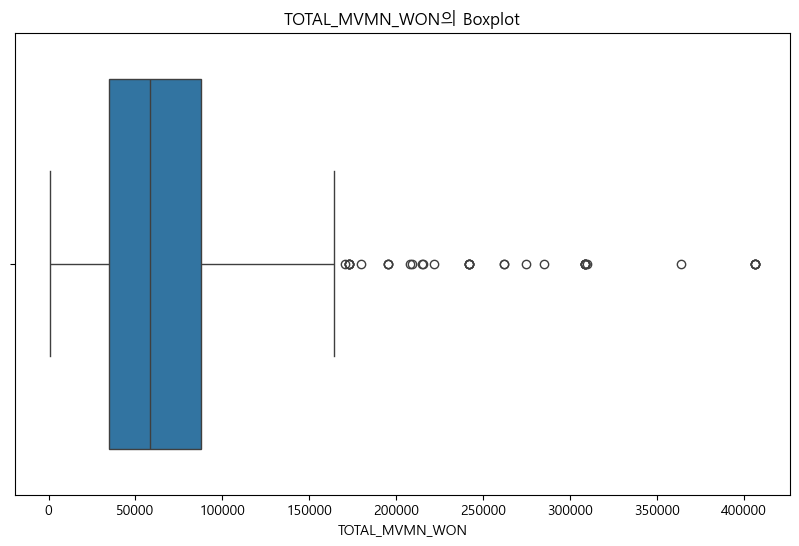

In [1279]:
# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=travel_log, x='TOTAL_MVMN_WON')
plt.title('TOTAL_MVMN_WON의 Boxplot')
plt.xlabel('TOTAL_MVMN_WON')
plt.show()

> BOXPLOT의 이상치 기준인 1.5IQR을 넘어서는 수치는 많지만, 해당 수치들은 대부분 모여 있으며 분석에 필요한 데이터들이므로, 350000 이상의 데이터만 제거하기로 결정함

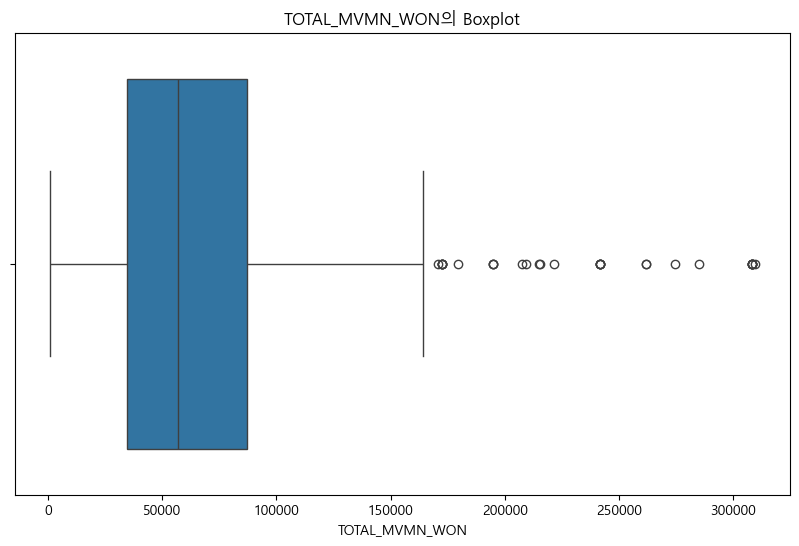

In [1280]:
# 'TOTAL_MVMN_WON' 400000 이상의 값 제거
travel_log = travel_log[travel_log['TOTAL_MVMN_WON'] < 350000]

# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=travel_log, x='TOTAL_MVMN_WON')
plt.title('TOTAL_MVMN_WON의 Boxplot')
plt.xlabel('TOTAL_MVMN_WON')
plt.show()


<2> TOTAL_ACTIVITY_WON

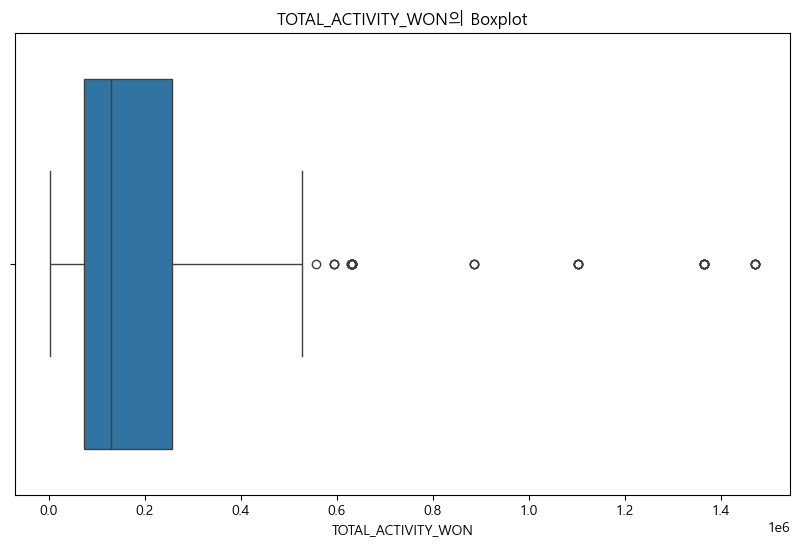

In [1281]:
# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=travel_log, x='TOTAL_ACTIVITY_WON')
plt.title('TOTAL_ACTIVITY_WON의 Boxplot')
plt.xlabel('TOTAL_ACTIVITY_WON')
plt.show()

> BOXPLOT의 이상치 기준인 1.5IQR을 넘어서는 수치는 많지만, 해당 수치들은 대부분 모여 있으며 분석에 필요한 데이터들이므로, 현재 x축 단위인 1e6 기준으로 0.8 이상의 데이터만 제거하기로 결정함

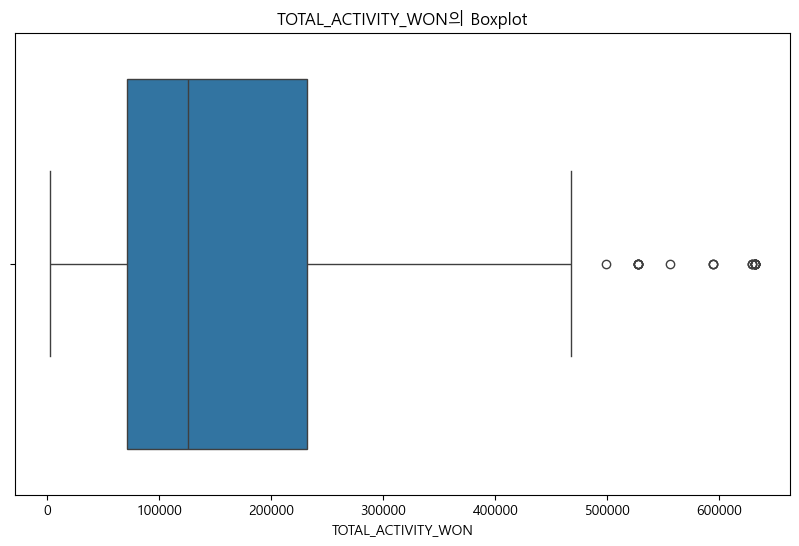

In [1282]:
# 1 이상인 값을 제거
travel_log = travel_log[travel_log['TOTAL_ACTIVITY_WON'] < 800000]

# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=travel_log, x='TOTAL_ACTIVITY_WON')
plt.title('TOTAL_ACTIVITY_WON의 Boxplot')
plt.xlabel('TOTAL_ACTIVITY_WON')
plt.show()


2. 결측치 처리 - 동반자정보 관련 변수인 REL_CD, COMPANION_GENDER, COMPANION_AGE_GRP 발생 이유 분석 위해 '나홀로 여행'인지 검증

In [1283]:
# REL_CD가 결측치이고, TRAVEL_STATUS_ACCOMPANY가 '나홀로 여행'인 데이터 필터링
missing_rel_cd_and_solotravel = travel_log[(travel_log['REL_CD'].isnull()) & (travel_log['TRAVEL_STATUS_ACCOMPANY'] == '나홀로 여행')]

# 해당 데이터의 개수
count = missing_rel_cd_and_solotravel.shape[0]

print(f"REL_CD가 결측치이고, TRAVEL_STATUS_ACCOMPANY가 '나홀로 여행'인 데이터의 개수: {count}")

REL_CD가 결측치이고, TRAVEL_STATUS_ACCOMPANY가 '나홀로 여행'인 데이터의 개수: 49


In [1284]:
# REL_CD가 결측치이고, TRAVEL_STATUS_ACCOMPANY가 '나홀로 여행'이 아닌 데이터 필터링
filtered_data = travel_log[travel_log['REL_CD'].isnull() & (travel_log['TRAVEL_STATUS_ACCOMPANY'] != '나홀로 여행')]

# 결과 출력
print(filtered_data)

Empty DataFrame
Columns: [GENDER, AGE_GRP, JOB_NM, TRAVEL_TERM, TRAVEL_LIKE_SGG_1, TRAVEL_LIKE_SGG_2, TRAVEL_LIKE_SGG_3, TRAVEL_STYL_1, TRAVEL_STYL_2, TRAVEL_STYL_3, TRAVEL_STYL_4, TRAVEL_STYL_5, TRAVEL_STYL_6, TRAVEL_STYL_7, TRAVEL_STYL_8, TRAVEL_STATUS_RESIDENCE, TRAVEL_STATUS_DESTINATION, TRAVEL_STATUS_ACCOMPANY, TRAVEL_MOTIVE, TRAVEL_COMPANIONS_NUM, TRAVEL_ID, REL_CD, COMPANION_GENDER, COMPANION_AGE_GRP, TRAVEL_PURPOSE, TRAVEL_START_YMD, TRAVEL_END_YMD, TRAVEL_MISSION_CHECK, MAJOR_TRANSPORT, TOTAL_MVMN_WON, MAJOR_ACTIVITY_TYPE, TOTAL_ACTIVITY_WON]
Index: []


In [1285]:
# '나홀로 여행'인 경우 동반자 정보 결측치를 처리
travel_log.loc[
    (travel_log['REL_CD'].isnull()) & (travel_log['TRAVEL_STATUS_ACCOMPANY'] == '나홀로 여행'), 
    ['REL_CD', 'COMPANION_GENDER', 'COMPANION_AGE_GRP']
] = ['없음', '없음', '없음']

# '나홀로 여행'이 아닌 경우 해당 행 삭제
travel_log = travel_log.drop(
    travel_log[(travel_log['REL_CD'].isnull()) & (travel_log['TRAVEL_STATUS_ACCOMPANY'] != '나홀로 여행')].index
)

# 결과 확인
null_status = travel_log[['REL_CD', 'COMPANION_GENDER', 'COMPANION_AGE_GRP']].isnull().sum()
print(null_status)

REL_CD               0
COMPANION_GENDER     0
COMPANION_AGE_GRP    0
dtype: int64


3. 결측치 처리 - MAJOR_TRANSPORT의 결측치는 없음으로, TOTAL_MVMN_WON의 결측치는 현재 TOTAL_MVMN_WON의 평균값으로 대체

In [1286]:
# MAJOR_TRANSPORT 결측치 처리
travel_log['MAJOR_TRANSPORT'].fillna('없음', inplace=True)

# TOTAL_MVMN_WON 결측치 처리
mean_total_mvmn_won = travel_log['TOTAL_MVMN_WON'].mean()
travel_log['TOTAL_MVMN_WON'].fillna(mean_total_mvmn_won, inplace=True)

# 결측치 처리 후 데이터 상태 확인
null_status = travel_log[['MAJOR_TRANSPORT', 'TOTAL_MVMN_WON']].isnull().sum()
print(null_status)

MAJOR_TRANSPORT    0
TOTAL_MVMN_WON     0
dtype: int64


4. 결측치 처리 - TOTAL_ACTIVITY_WON의 결측치를 현재 TOTAL_ACTIVITY_WON의 평균값으로 대체

In [1287]:
# TOTAL_ACTIVITY_WON 결측치의 평균값 계산
mean_total_activity_won = travel_log['TOTAL_ACTIVITY_WON'].mean()

# 결측치를 평균값으로 대체
travel_log['TOTAL_ACTIVITY_WON'].fillna(mean_total_activity_won, inplace=True)

# 결측치 처리 후 데이터 상태 확인
null_status_activity = travel_log['TOTAL_ACTIVITY_WON'].isnull().sum()
print(null_status_activity)

0


5. 이후 추가 분석시 사용하기 위해 이동수단총소비액과 활동총소비액을 합친 총소비액 파생변수 추가

In [1288]:
# TOTAL_WON 파생변수 추가
travel_log['TOTAL_WON'] = travel_log['TOTAL_MVMN_WON'] + travel_log['TOTAL_ACTIVITY_WON']

# 결과 확인
print(travel_log[['TOTAL_MVMN_WON', 'TOTAL_ACTIVITY_WON', 'TOTAL_WON']].head())

   TOTAL_MVMN_WON  TOTAL_ACTIVITY_WON  TOTAL_WON
0      119,000.00          336,010.00 455,010.00
1      119,000.00          336,010.00 455,010.00
2      119,000.00          336,010.00 455,010.00
3      119,000.00          336,010.00 455,010.00
4       15,700.00          102,700.00 118,400.00


6. 이후 추가 분석시 사용하기 위해 여행 기간 파생변수 추가

In [1289]:
# 날짜 변환
travel_log['TRAVEL_START_YMD'] = pd.to_datetime(travel_log['TRAVEL_START_YMD'])
travel_log['TRAVEL_END_YMD'] = pd.to_datetime(travel_log['TRAVEL_END_YMD'])

# 여행 기간 계산
travel_log['TRAVEL_DURATION'] = (travel_log['TRAVEL_END_YMD'] - travel_log['TRAVEL_START_YMD']).dt.days

# 결과 확인
print(travel_log[['TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'TRAVEL_DURATION']].head(50))

   TRAVEL_START_YMD TRAVEL_END_YMD  TRAVEL_DURATION
0        2023-08-12     2023-08-15                3
1        2023-08-12     2023-08-15                3
2        2023-08-12     2023-08-15                3
3        2023-08-12     2023-08-15                3
4        2023-09-16     2023-09-17                1
5        2023-07-05     2023-07-06                1
6        2023-07-05     2023-07-06                1
7        2023-06-16     2023-06-18                2
8        2023-09-28     2023-09-29                1
9        2023-06-17     2023-06-19                2
10       2023-08-11     2023-08-12                1
11       2023-08-23     2023-08-24                1
12       2023-08-15     2023-08-16                1
13       2023-08-26     2023-08-28                2
15       2023-07-14     2023-07-16                2
16       2023-07-14     2023-07-16                2
17       2023-09-08     2023-09-09                1
18       2023-08-31     2023-09-01                1
19       202

7. 이후 추가 분석시 사용하기 위해 여행 계절 파생변수 추가

In [1290]:
# 계절별 분류 함수 정의
def categorize_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# 'TRAVEL_START_YMD'에서 월을 추출하여 계절 분류
travel_log['SEASON'] = travel_log['TRAVEL_START_YMD'].dt.month.apply(categorize_season)

# 결과 확인
print(travel_log[['TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'TRAVEL_DURATION', 'SEASON']].head(50))

   TRAVEL_START_YMD TRAVEL_END_YMD  TRAVEL_DURATION  SEASON
0        2023-08-12     2023-08-15                3  Summer
1        2023-08-12     2023-08-15                3  Summer
2        2023-08-12     2023-08-15                3  Summer
3        2023-08-12     2023-08-15                3  Summer
4        2023-09-16     2023-09-17                1  Autumn
5        2023-07-05     2023-07-06                1  Summer
6        2023-07-05     2023-07-06                1  Summer
7        2023-06-16     2023-06-18                2  Summer
8        2023-09-28     2023-09-29                1  Autumn
9        2023-06-17     2023-06-19                2  Summer
10       2023-08-11     2023-08-12                1  Summer
11       2023-08-23     2023-08-24                1  Summer
12       2023-08-15     2023-08-16                1  Summer
13       2023-08-26     2023-08-28                2  Summer
15       2023-07-14     2023-07-16                2  Summer
16       2023-07-14     2023-07-16      

<h3>3. 전처리 후 확인</h3>

In [1291]:
# 데이터의 행, 열 개수 출력
print('merge 데이터의 행, 열 개수 : ')
print(travel_log.shape)

merge 데이터의 행, 열 개수 : 
(456, 35)


In [1292]:
# 데이터의 구조와 타입 확인
print('merge 데이터의 구조와 타입 : ')
print(travel_log.info())

merge 데이터의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 517
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   GENDER                     456 non-null    object        
 1   AGE_GRP                    456 non-null    int64         
 2   JOB_NM                     456 non-null    object        
 3   TRAVEL_TERM                456 non-null    object        
 4   TRAVEL_LIKE_SGG_1          456 non-null    int64         
 5   TRAVEL_LIKE_SGG_2          456 non-null    int64         
 6   TRAVEL_LIKE_SGG_3          456 non-null    int64         
 7   TRAVEL_STYL_1              456 non-null    object        
 8   TRAVEL_STYL_2              456 non-null    object        
 9   TRAVEL_STYL_3              456 non-null    object        
 10  TRAVEL_STYL_4              456 non-null    object        
 11  TRAVEL_STYL_5              456 non-null    object      

In [1293]:
# 데이터의 결측치 확인
print('merge 데이터.csv의 결측치 : ')
print(travel_log.isnull().sum())

merge 데이터.csv의 결측치 : 
GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
TRAVEL_ID                    0
REL_CD                       0
COMPANION_GENDER             0
COMPANION_AGE_GRP            0
TRAVEL_PURPOSE               0
TRAVEL_START_YMD             0
TRAVEL_END_YMD               0
TRAVEL_MISSION_CHECK         0
MAJOR_TRANSPORT              0
TOTAL_MVMN_WON               0
MAJOR_ACTIVITY_TYPE          0
TOTAL_ACTIVITY_WO

<h3>4. 병합 CSV 저장</h3>

In [1294]:
travel_log.to_csv('data/validation/merged_data/merge_validation.csv',index=False)